In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Some Relivant Library

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/Raw material/Raw Material(Minerals&Metals).csv")
df

Month  Ferro Nickel  Magnesium  Aluminium  Molybdenum  Vanadium  \
0   Jan-20           NaN        NaN   126.4699         NaN  1497.500   
1   Feb-20           NaN        NaN   120.6124         NaN  1192.880   
2   Mar-20           NaN        NaN   119.7152         NaN  1065.580   
3   Apr-20           NaN        NaN   111.2309         NaN  1007.480   
4   May-20           NaN        NaN   110.9454         NaN  1049.740   
5   Jun-20           NaN        NaN   118.7544         NaN  1068.940   
6   Jul-20           NaN        NaN   123.3156         NaN  1058.220   
7   Aug-20           NaN        NaN   129.7245         NaN  1053.910   
8   Sep-20           NaN        NaN   128.1651         NaN  1036.320   
9   Oct-20           NaN        NaN   132.7034         NaN  1036.320   
10  Nov-20           NaN        NaN   143.7289         NaN   215.461   
11  Dec-20           NaN        NaN   148.3963         NaN  1046.960   
12  Jan-21      1305.933        NaN   146.5060     337.190   218.040   
13  Feb-21      1352.305        NaN   151.2500     384.082   220.678   
14  Mar-21      1194.287        NaN   159.4512     398.584   245.941   
15  Apr-21      1229.486        NaN   172.6054     376.034   251.740   
16  May-21      1289.421        NaN   178.5194     422.101   247.626   
17  Jun-21      1322.546        NaN   179.9713     570.509   263.522   
18  Jul-21      1402.374        NaN   186.1266     624.785   288.269   
19  Aug-21      1419.888        NaN   193.0879     638.448   303.911   
20  Sep-21      1426.430        NaN   208.6662     659.891   308.140   
21  Oct-21      1450.310        NaN   219.7959     644.907   314.420   
22  Nov-21      1484.661        NaN   196.3709     643.010   312.620   
23  Dec-21      1511.960        NaN   203.6184     636.320   316.090   
24  Jan-22      1664.323     5335.0   223.7903     641.220   312.620   
25  Feb-22      1801.940     5788.0   243.5388     646.270   314.920   
26  Mar-22      2586.531     5332.0   266.7314     635.580   319.660   
27  Apr-22      2524.110     5465.0   247.1648     664.110   319.660   
28  May-22      2169.492     5302.0   218.8097     663.180   324.080   
29  Jun-22      2003.383     5471.0   200.1491     612.100   327.220   
30  Jul-22      1710.373     5432.0   191.7567     593.980   333.680   
31  Aug-22      1754.777     5236.0   193.3816     530.350   333.680   
32  Sep-22      1827.558     5837.0   178.5318     610.110   336.330   
33  Oct-22      1814.031     5345.0   185.7051     701.800   345.410   
34  Nov-22      2091.737     5174.0   192.3540     707.200   343.400   
35  Dec-22      2384.098     5587.0   197.8064     905.800   346.030   
36  Jan-23      2308.828        NaN   204.8715    1161.390   344.030   
37  Feb-23      2207.842        NaN   199.5867    1394.520   346.370   
38  Mar-23      1916.474        NaN   188.9778    1196.170   345.470   
39  Apr-23      1959.851        NaN   192.1936     748.800   345.030   
40  May-23      1808.888        NaN   186.7807     787.420   345.410   
41  Jun-23      1746.441        NaN   179.6961     834.840   345.470   
42  Jul-23      1733.212        NaN   177.4797     834.840   345.030   
43  Aug-23      1692.022        NaN   176.8768     930.840   349.100   
44  Sep-23      1631.655        NaN   181.4555     910.410   348.040   
45  Oct-23      1521.626        NaN   182.4672     790.290   349.100   
46  Nov-23      1418.224        NaN   183.4281     661.590   349.540   
47  Dec-23      1371.177        NaN        NaN     681.250       NaN   

    Graphite  Manganese  Fluorite  
0     38.000     18.420     5.220  
1     35.332     20.050     8.125  
2     33.667     24.394     8.462  
3        NaN        NaN       NaN  
4        NaN     23.966     8.974  
5     33.000     25.385     8.849  
6     35.227        NaN     4.872  
7     33.385     22.474     8.658  
8     34.137     21.168     8.574  
9     34.227     22.927     4.871  
10    34.310     21.168     7.239  
11    34.390     20.482       NaN  
12    34

In [ ]:
print(df)

     Month  Ferro Nickel  Magnesium  Aluminium  Molybdenum  Vanadium  \
0   Jan-20           NaN        NaN   126.4699         NaN  1497.500   
1   Feb-20           NaN        NaN   120.6124         NaN  1192.880   
2   Mar-20           NaN        NaN   119.7152         NaN  1065.580   
3   Apr-20           NaN        NaN   111.2309         NaN  1007.480   
4   May-20           NaN        NaN   110.9454         NaN  1049.740   
5   Jun-20           NaN        NaN   118.7544         NaN  1068.940   
6   Jul-20           NaN        NaN   123.3156         NaN  1058.220   
7   Aug-20           NaN        NaN   129.7245         NaN  1053.910   
8   Sep-20           NaN        NaN   128.1651         NaN  1036.320   
9   Oct-20           NaN        NaN   132.7034         NaN  1036.320   
10  Nov-20           NaN        NaN   143.7289         NaN   215.461   
11  Dec-20           NaN        NaN   148.3963         NaN  1046.960   
12  Jan-21      1305.933        NaN   146.5060     337.190   218

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         48 non-null     object 
 1   Ferro Nickel  36 non-null     float64
 2   Magnesium     12 non-null     float64
 3   Aluminium     47 non-null     float64
 4   Molybdenum    36 non-null     float64
 5   Vanadium      47 non-null     float64
 6   Graphite      46 non-null     float64
 7   Manganese     45 non-null     float64
 8   Fluorite      42 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.5+ KB


Exploratory Data Analysis

1st Moment Business Decision (Measures of Central Tendency)

1) Mean

2) Median

3) Mode

In [ ]:
df['Ferro Nickel'].mean()

1723.2831666666668

In [ ]:
df['Magnesium'].mean()

5442.0

In [ ]:
df['Aluminium'].mean()

176.66520425531917

In [ ]:
df['Molybdenum'].mean()

699.4422500000001

In [ ]:
df['Vanadium'].mean()

497.6508085106383

In [ ]:
df['Graphite'].mean()

41.50513043478261

In [ ]:
df['Manganese'].mean()

21.5946

In [ ]:
df['Fluorite'].mean()

6.4226904761904775

In [ ]:
df['Ferro Nickel'].median()

1701.1975

In [ ]:
df['Magnesium'].median()

5388.5

In [ ]:
df['Aluminium'].median()

182.4672

In [ ]:
df['Molybdenum'].median()

653.0805

In [ ]:
df['Vanadium'].median()

344.03

In [ ]:
df['Graphite'].median()

41.096000000000004

In [ ]:
df['Manganese'].median()

21.356

In [ ]:
df['Fluorite'].median()

6.2575

In [ ]:
df["Ferro Nickel"].mode()

0     1194.287
1     1229.486
2     1289.421
3     1305.933
4     1322.546
5     1352.305
6     1371.177
7     1402.374
8     1418.224
9     1419.888
10    1426.430
11    1450.310
12    1484.661
13    1511.960
14    1521.626
15    1631.655
16    1664.323
17    1692.022
18    1710.373
19    1733.212
20    1746.441
21    1754.777
22    1801.940
23    1808.888
24    1814.031
25    1827.558
26    1916.474
27    1959.851
28    2003.383
29    2091.737
30    2169.492
31    2207.842
32    2308.828
33    2384.098
34    2524.110
35    2586.531
Name: Ferro Nickel, dtype: float64

In [ ]:
df["Magnesium"].mode()

0     5174.0
1     5236.0
2     5302.0
3     5332.0
4     5335.0
5     5345.0
6     5432.0
7     5465.0
8     5471.0
9     5587.0
10    5788.0
11    5837.0
Name: Magnesium, dtype: float64

In [ ]:
df["Aluminium"].mode()

0     110.9454
1     111.2309
2     118.7544
3     119.7152
4     120.6124
5     123.3156
6     126.4699
7     128.1651
8     129.7245
9     132.7034
10    143.7289
11    146.5060
12    148.3963
13    151.2500
14    159.4512
15    172.6054
16    176.8768
17    177.4797
18    178.5194
19    178.5318
20    179.6961
21    179.9713
22    181.4555
23    182.4672
24    183.4281
25    185.7051
26    186.1266
27    186.7807
28    188.9778
29    191.7567
30    192.1936
31    192.3540
32    193.0879
33    193.3816
34    196.3709
35    197.8064
36    199.5867
37    200.1491
38    203.6184
39    204.8715
40    208.6662
41    218.8097
42    219.7959
43    223.7903
44    243.5388
45    247.1648
46    266.7314
Name: Aluminium, dtype: float64

In [ ]:
df["Molybdenum"].mode()

0    834.84
Name: Molybdenum, dtype: float64

In [ ]:
df["Vanadium"].mode()

0     312.62
1     319.66
2     333.68
3     345.03
4     345.41
5     345.47
6     349.10
7    1036.32
Name: Vanadium, dtype: float64

In [ ]:
df["Graphite"].mode()

0     33.000
1     33.385
2     33.667
3     34.023
4     34.137
5     34.227
6     34.310
7     34.390
8     35.227
9     35.332
10    35.516
11    35.545
12    35.640
13    35.810
14    37.295
15    38.000
16    39.385
17    39.769
18    39.851
19    39.867
20    40.882
21    41.010
22    41.067
23    41.125
24    43.382
25    44.500
26    44.540
27    45.085
28    45.250
29    45.315
30    45.667
31    45.870
32    45.872
33    46.270
34    46.349
35    46.391
36    46.554
37    46.889
38    46.935
39    47.409
40    47.554
41    47.859
42    48.567
43    48.611
44    50.722
45    51.185
Name: Graphite, dtype: float64

In [ ]:
df["Manganese"].mode()

0    21.168
Name: Manganese, dtype: float64

In [ ]:
df["Fluorite"].mode()

0    8.462
Name: Fluorite, dtype: float64

2nd Moment Business Decision (Measures of Dispersion)

1) Variance

2) Standard deviation

3) Range (maximum - minimum)

In [ ]:
df['Ferro Nickel'].var()

138742.92965025717

In [ ]:
df['Ferro Nickel'].std()

372.4821199067912

In [ ]:
range_value = max(df['Ferro Nickel']) - min(df['Ferro Nickel'])
range_value

nan

In [ ]:
df['Magnesium'].var()

42277.63636363636

In [ ]:
df['Magnesium'].std()

205.6152629637118

In [ ]:
range_value = max(df['Magnesium']) - min(df['Magnesium'])
range_value

nan

In [ ]:
df['Aluminium'].var()

1383.370292005634

In [ ]:
df['Aluminium'].std()

37.193686184695835

In [ ]:
range_value = max(df['Aluminium']) - min(df['Aluminium'])
range_value

155.786

In [ ]:
df['Molybdenum'].var()

49981.14913756429

In [ ]:
df['Molybdenum'].std()

223.56464196639925

In [ ]:
range_value = max(df['Molybdenum']) - min(df['Molybdenum'])
range_value

nan

In [ ]:
df['Vanadium'].var()

119284.94470863648

In [ ]:
df['Vanadium'].std()

345.3765259953787

In [ ]:
range_value = max(df['Vanadium']) - min(df['Vanadium'])
range_value

1282.039

In [ ]:
df['Graphite'].var()

30.851919804830917

In [ ]:
df['Graphite'].std()

5.554450450299374

In [ ]:
range_value = max(df['Graphite']) - min(df['Graphite'])
range_value

18.185000000000002

In [ ]:
df['Manganese'].var()

8.534709745454547

In [ ]:
df['Manganese'].std()

2.9214225551012896

In [ ]:
range_value = max(df['Manganese']) - min(df['Manganese'])
range_value

12.304

In [ ]:
df['Fluorite'].var()

2.8107528042973287

In [ ]:
df['Fluorite'].std()

1.6765299890838006

In [ ]:
range_value = max(df['Fluorite']) - min(df['Fluorite'])
range_value

5.897

3rd Business Moment Decision (Skewness)

Measure of asymmetry in the data distribution

In [ ]:
df['Ferro Nickel'].skew()

0.6991456685890592

In [ ]:
df['Magnesium'].skew()

0.9027078769004093

In [ ]:
df['Molybdenum'].skew()

1.1402248973538354

In [ ]:
df['Vanadium'].skew()

1.4166776182281131

In [ ]:
df['Graphite'].skew()

-0.09291557458841625

In [ ]:
df['Manganese'].skew()

0.37970654003383286

In [ ]:
df['Fluorite'].skew()

-0.06690488230587611

4th Business Moment Decision (Kurtosis)

Measure of peakedness - represents the overall spread in the data

In [ ]:
df['Ferro Nickel'].kurt()

-0.26106661599954606

In [ ]:
df['Magnesium'].kurt()

0.09502873800565848

In [ ]:
df['Molybdenum'].kurt()

2.168312625086376

In [ ]:
df['Vanadium'].kurt()

0.4746959761323999

In [ ]:
df['Graphite'].kurt()

-1.4295409499291851

In [ ]:
df['Manganese'].kurt()

-0.44617509291877777

In [ ]:
df['Fluorite'].kurt()

-1.022418746169405

AUTO EDA

Sweet Viz

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 48.0 MB/s eta 0:00:00


In [ ]:
# pip install sweetviz
import sweetviz as sv

In [ ]:
s=sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
s.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


D - Tale

In [ ]:
!pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 40.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 107.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 95.8 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62566 sha256=f6c7b64512788564a8cc655c6df9c0ed6398fb37aeb85f563f1f97e8f8973562
  Stored in directory

In [ ]:
# pip install dtale
import dtale
import pandas as pd

df = pd.read_csv(r"/content/drive/MyDrive/Raw material/Raw Material(Minerals&Metals).csv")

d = dtale.show(df)
d.open_browser()

AUTO VIZ

In [ ]:
!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 33.3 MB/s eta 0:00:00
  Attempting uninstall: param
    Found existing installation: param 2.1.0
    Uninstalling param-2.1.0:
      Successfully uninstalled param-2.1.0
  Attempting uninstall: numpy
    Found existing

Imported v0.1.808. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (48, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Da

Number of All Scatter Plots = 36


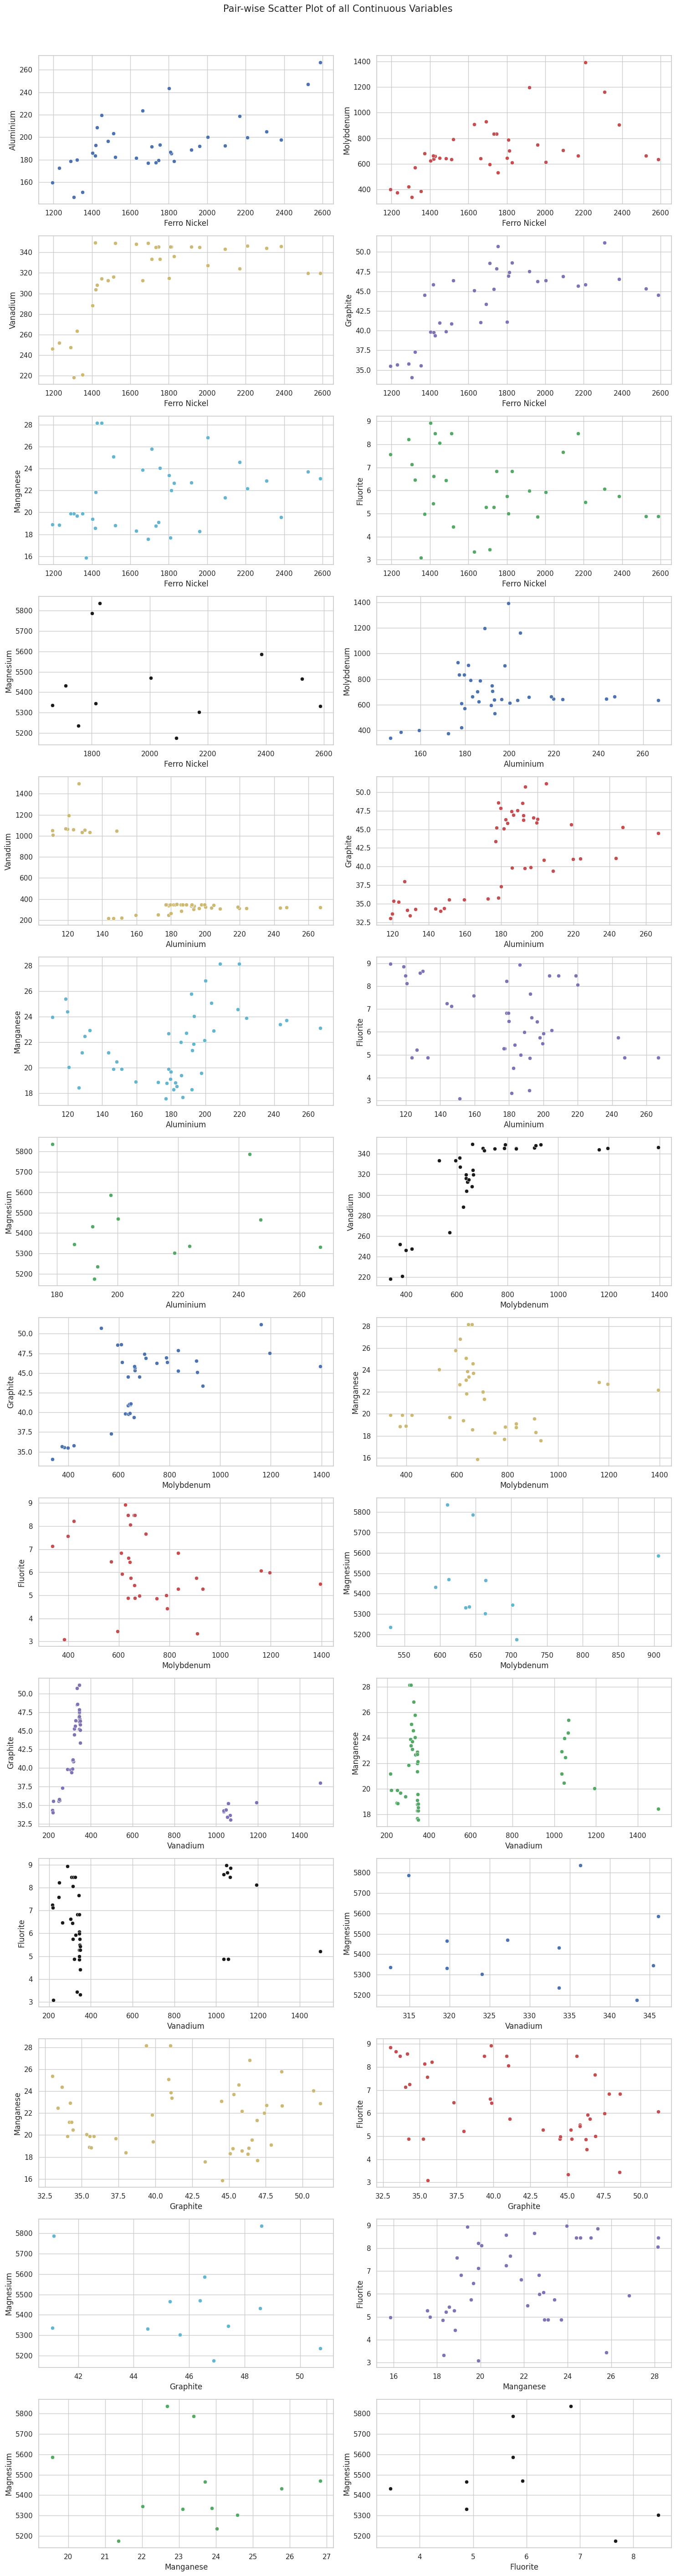

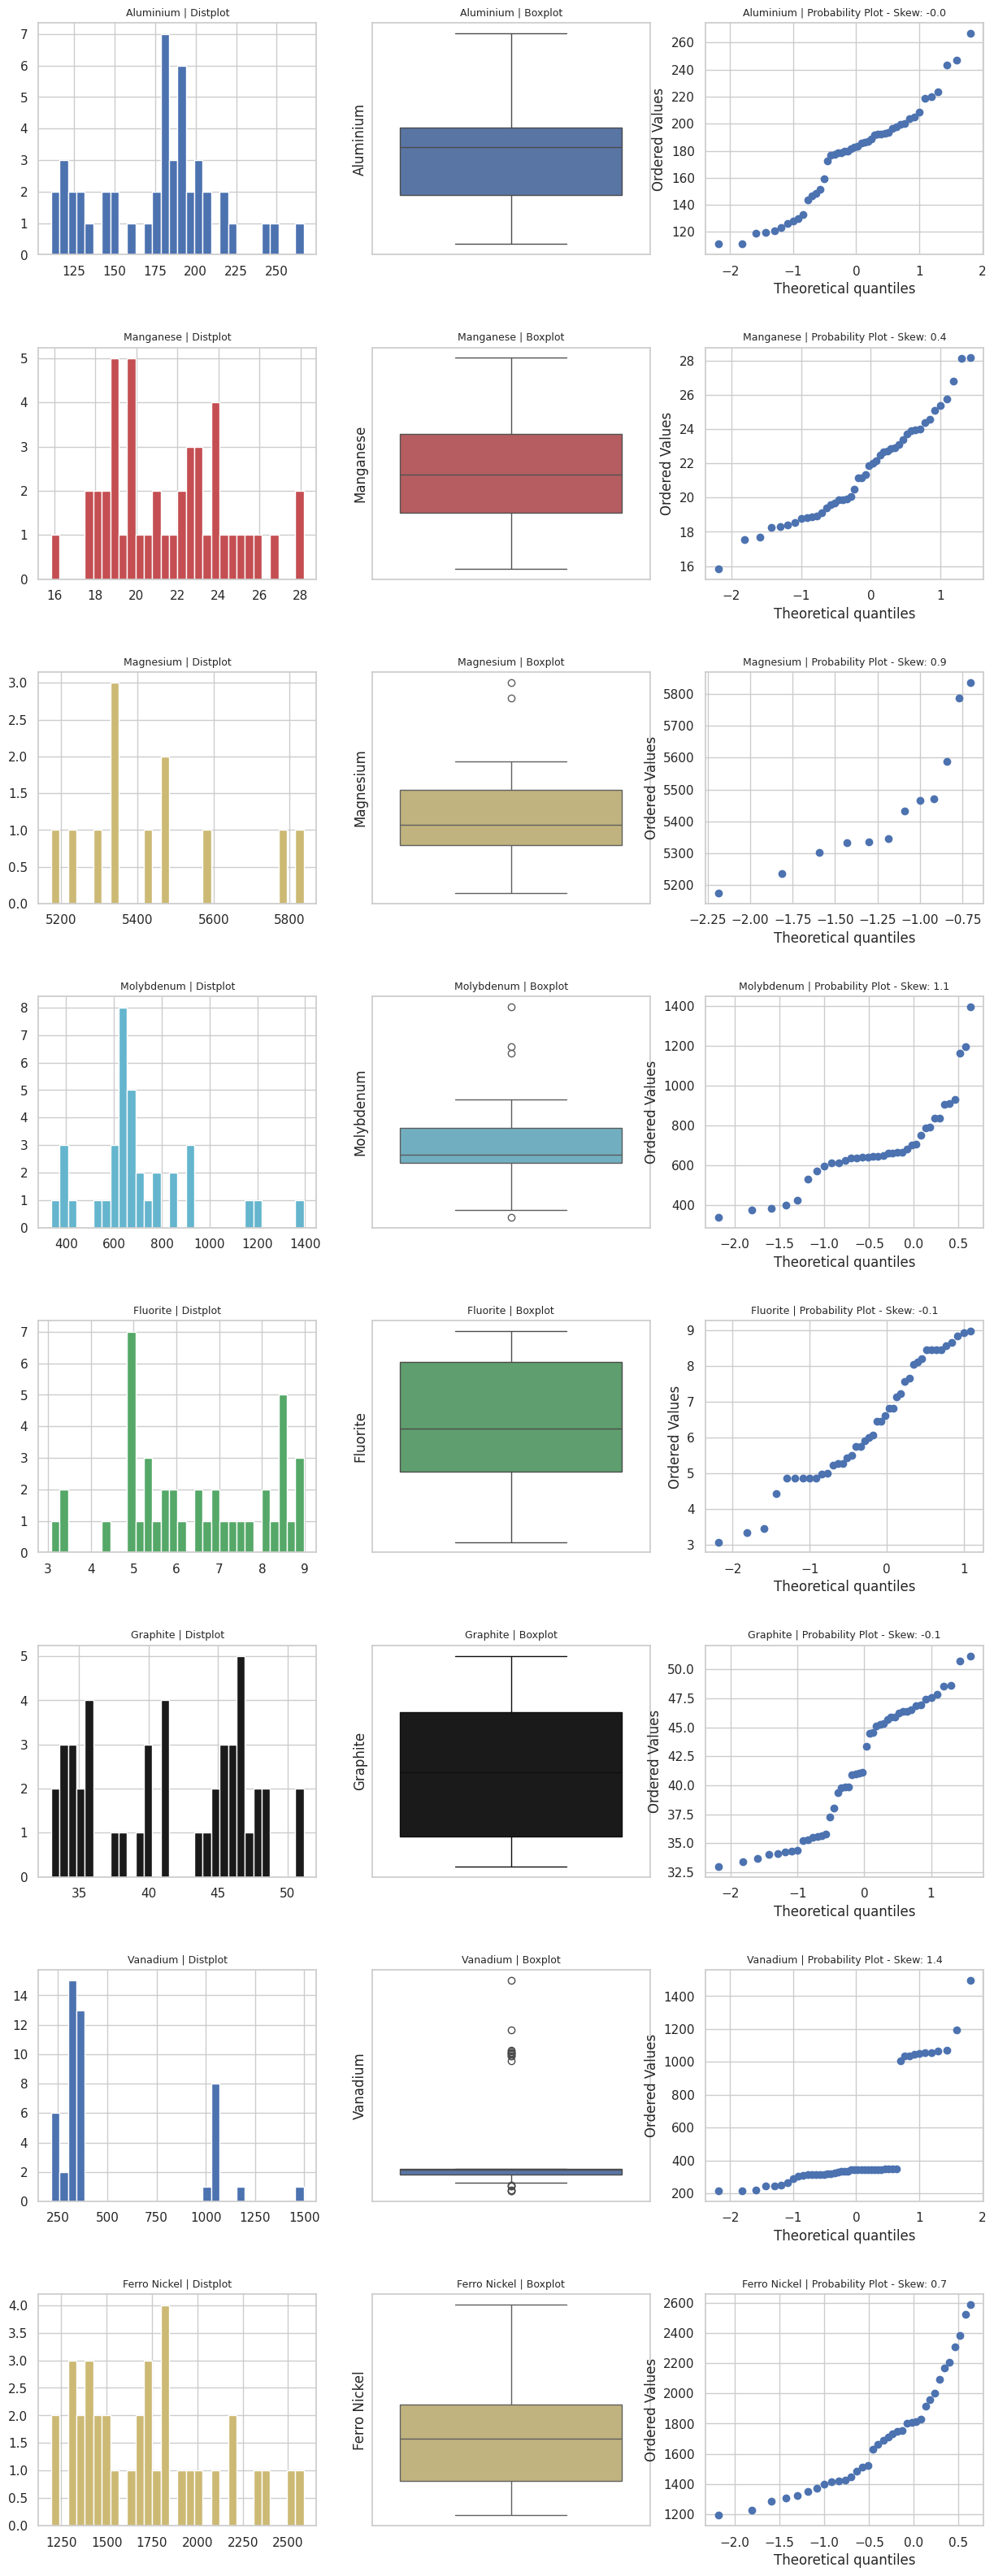

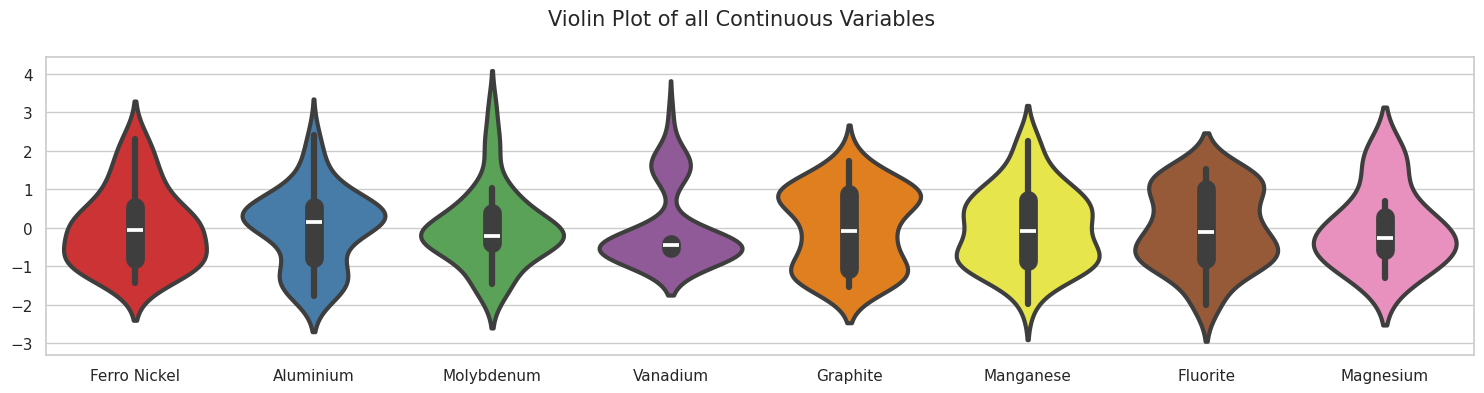

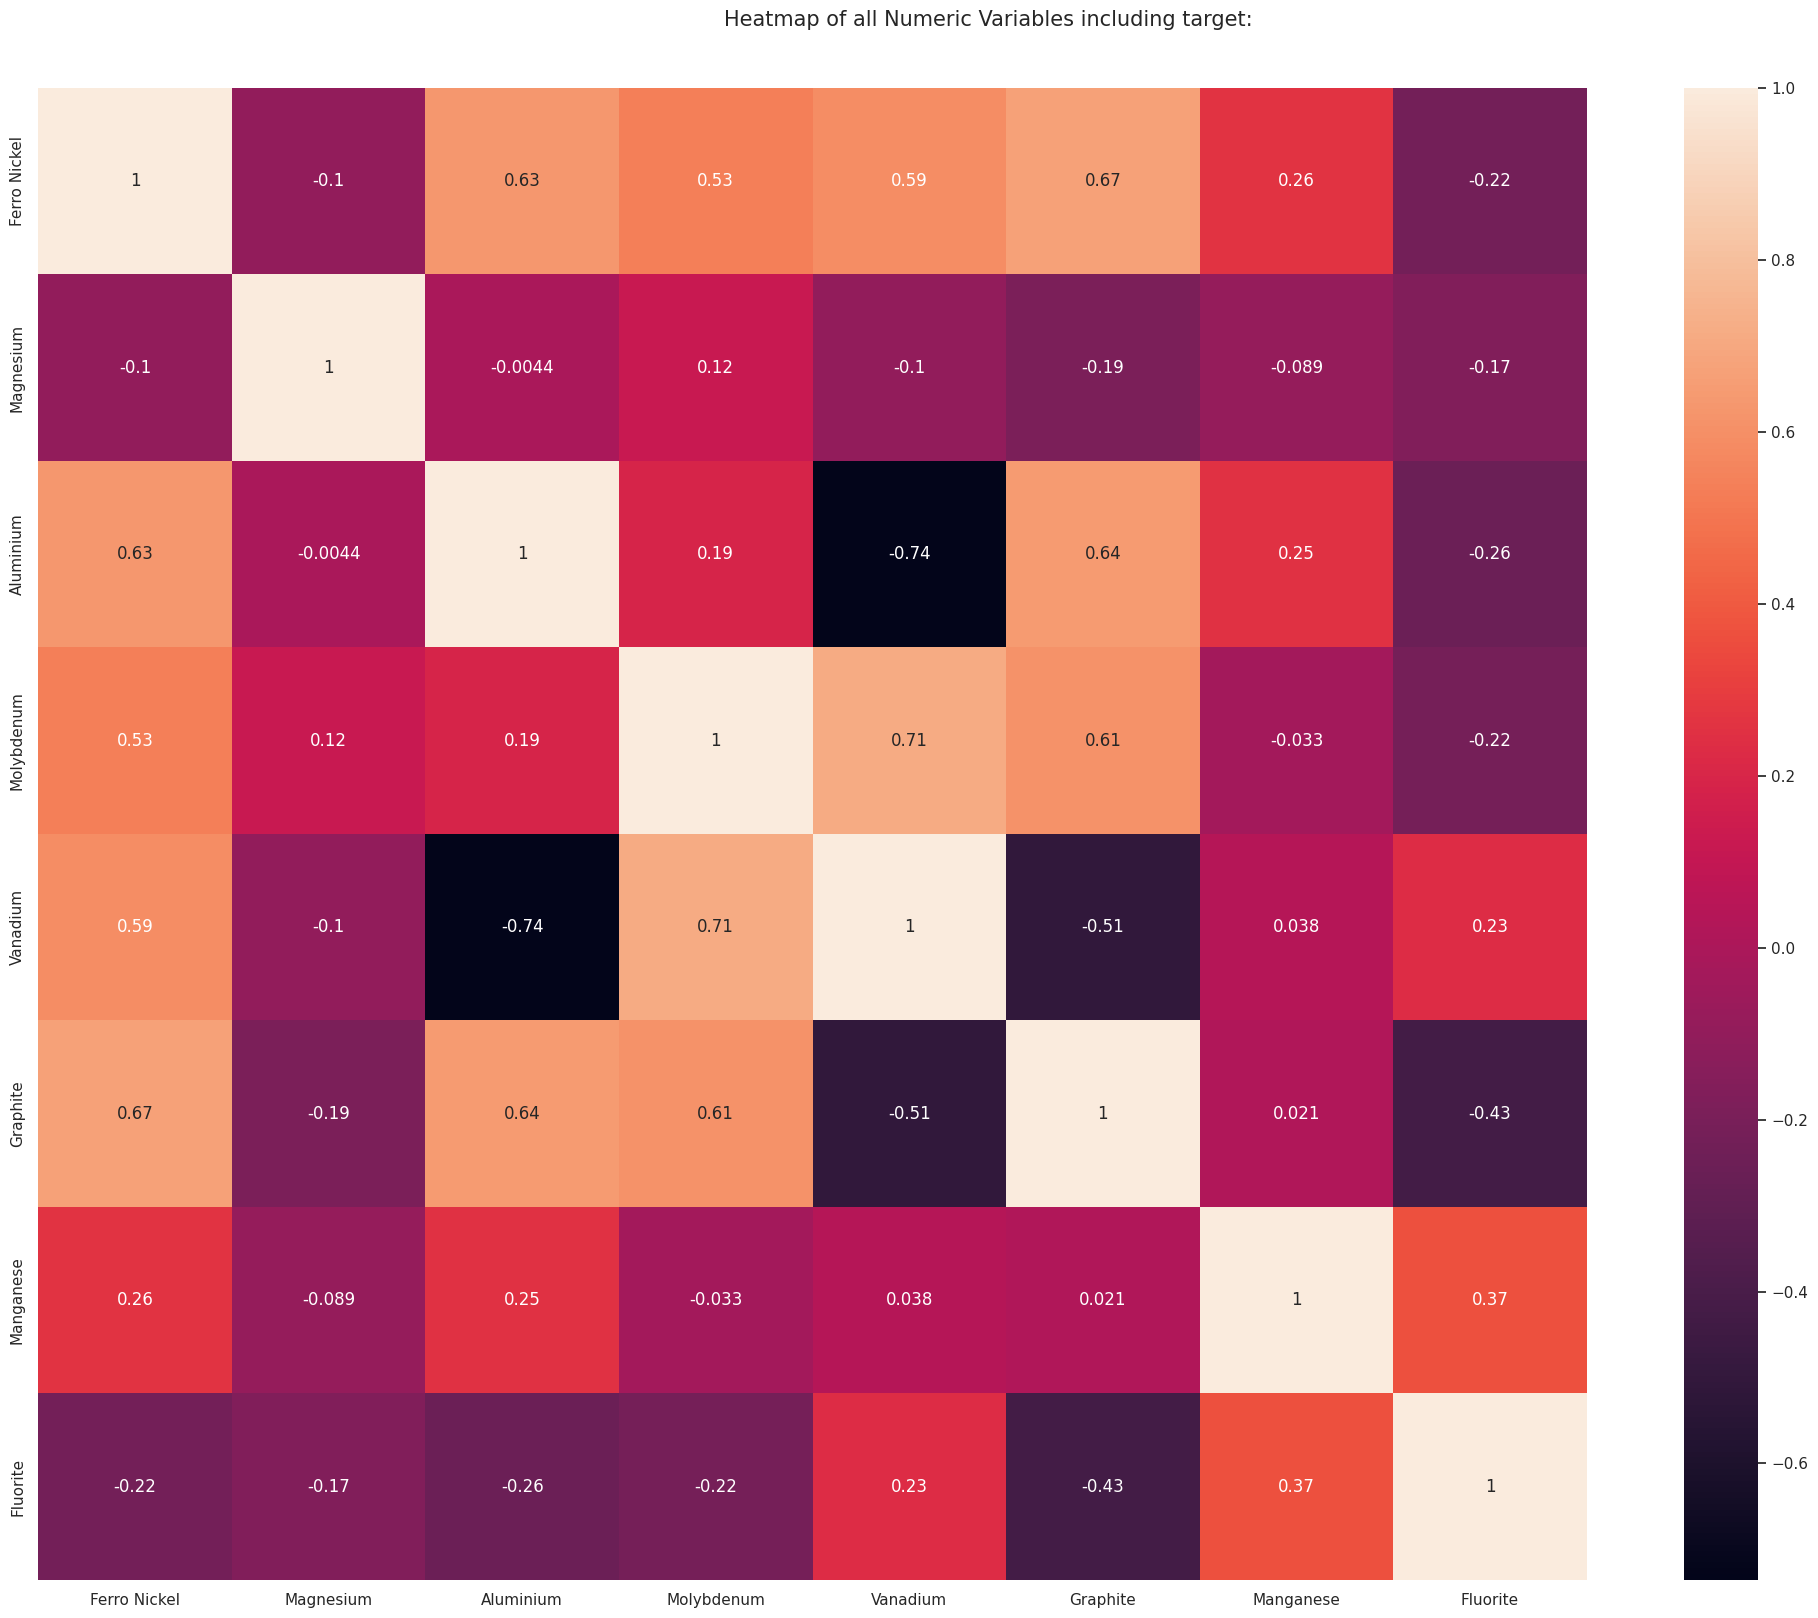

All Plots done
Time to run AutoViz = 15 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


Month   Ferro Nickel  Magnesium  Aluminium  Molybdenum  Vanadium  \
0   Jan-20         NaN        NaN    126.4699         NaN   1497.500   
1   Feb-20         NaN        NaN    120.6124         NaN   1192.880   
2   Mar-20         NaN        NaN    119.7152         NaN   1065.580   
3   Apr-20         NaN        NaN    111.2309         NaN   1007.480   
4   May-20         NaN        NaN    110.9454         NaN   1049.740   
5   Jun-20         NaN        NaN    118.7544         NaN   1068.940   
6   Jul-20         NaN        NaN    123.3156         NaN   1058.220   
7   Aug-20         NaN        NaN    129.7245         NaN   1053.910   
8   Sep-20         NaN        NaN    128.1651         NaN   1036.320   
9   Oct-20         NaN        NaN    132.7034         NaN   1036.320   
10  Nov-20         NaN        NaN    143.7289         NaN    215.461   
11  Dec-20         NaN        NaN    148.3963         NaN   1046.960   
12  Jan-21    1305.933        NaN    146.5060     337.190    218.040   
13  Feb-21    1352.305        NaN    151.2500     384.082    220.678   
14  Mar-21    1194.287        NaN    159.4512     398.584    245.941   
15  Apr-21    1229.486        NaN    172.6054     376.034    251.740   
16  May-21    1289.421        NaN    178.5194     422.101    247.626   
17  Jun-21    1322.546        NaN    179.9713     570.509    263.522   
18  Jul-21    1402.374        NaN    186.1266     624.785    288.269   
19  Aug-21    1419.888        NaN    193.0879     638.448    303.911   
20  Sep-21    1426.430        NaN    208.6662     659.891    308.140   
21  Oct-21    1450.310        NaN    219.7959     644.907    314.420   
22  Nov-21    1484.661        NaN    196.3709     643.010    312.620   
23  Dec-21    1511.960        NaN    203.6184     636.320    316.090   
24  Jan-22    1664.323     5335.0    223.7903     641.220    312.620   
25  Feb-22    1801.940     5788.0    243.5388     646.270    314.920   
26  Mar-22    2586.531     5332.0    266.7314     635.580    319.660   
27  Apr-22    2524.110     5465.0    247.1648     664.110    319.660   
28  May-22    2169.492     5302.0    218.8097     663.180    324.080   
29  Jun-22    2003.383     5471.0    200.1491     612.100    327.220   
30  Jul-22    1710.373     5432.0    191.7567     593.980    333.680   
31  Aug-22    1754.777     5236.0    193.3816     530.350    333.680   
32  Sep-22    1827.558     5837.0    178.5318     610.110    336.330   
33  Oct-22    1814.031     5345.0    185.7051     701.800    345.410   
34  Nov-22    2091.737     5174.0    192.3540     707.200    343.400   
35  Dec-22    2384.098     5587.0    197.8064     905.800    346.030   
36  Jan-23    2308.828        NaN    204.8715    1161.390    344.030   
37  Feb-23    2207.842        NaN    199.5867    1394.520    346.370   
38  Mar-23    1916.474        NaN    188.9778    1196.170    345.470   
39  Apr-23    1959.851        NaN    192.1936     748.800    345.030   
40  May-23    1808.888        NaN    186.7807     787.420    345.410   
41  Jun-23    1746.441        NaN    179.6961     834.840    345.470   
42  Jul-23    1733.212        NaN    177.4797     834.840    345.030   
43  Aug-23    1692.022        NaN    176.8768     930.840    349.100   
44  Sep-23    1631.655        NaN    181.4555     910.410    348.040   
45  Oct-23    1521.626        NaN    182.4672     790.290    349.100   
46  Nov-23    1418.224        NaN    183.4281     661.590    349.540   
47  Dec-23    1371.177        NaN         NaN     681.250        NaN   

    Graphite  Manganese  Fluorite  
0    38.000    18.420      5.220   
1    35.332    20.050      8.125   
2    33.667    24.394      8.462   
3       NaN       NaN        NaN   
4       NaN    23.966      8.974   
5    33.000    25.385      8.849   
6    35.227       NaN      4.872   
7    33.385    22.474      8.658   
8    34.137    21.168      8.574   
9    34.227    22.927      4.871   
10   34.310    21.168      7.239   
11   34.390    20.482        NaN   
12   34

In [ ]:
# pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AutoViz_Class().AutoViz("/content/drive/MyDrive/Raw material/Raw Material(Minerals&Metals).csv")

Data Perp

In [ ]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 38.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.0 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252696 sha256=60120c38ba9

In [ ]:
from dataprep.eda import create_report
import pandas as pd

# Load your dataset into a DataFrame
df = pd.read_csv(r"/content/drive/MyDrive/Raw material/Raw Material(Minerals&Metals).csv")

# Generate the EDA report
report = create_report(df)

# Save the report to an HTML file
report.save("eda_report.html")

Report has been saved to eda_report.html!


Some Graphical Representation

Line Chart

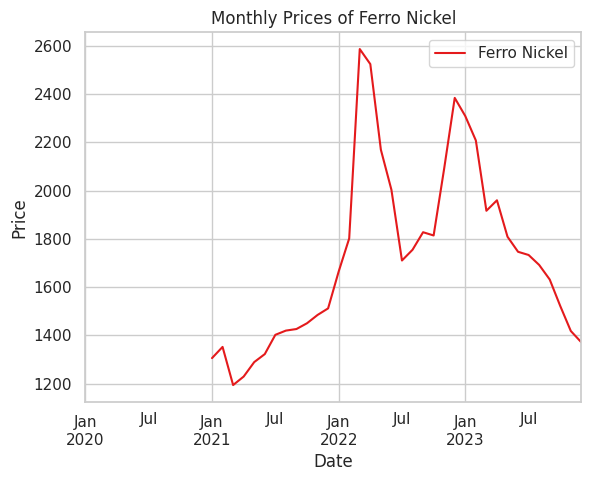

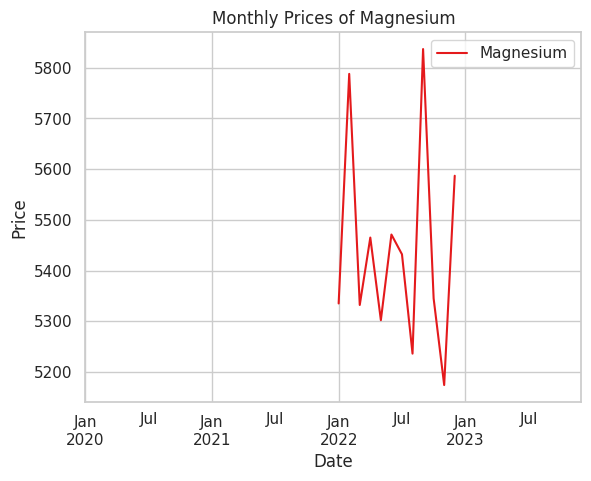

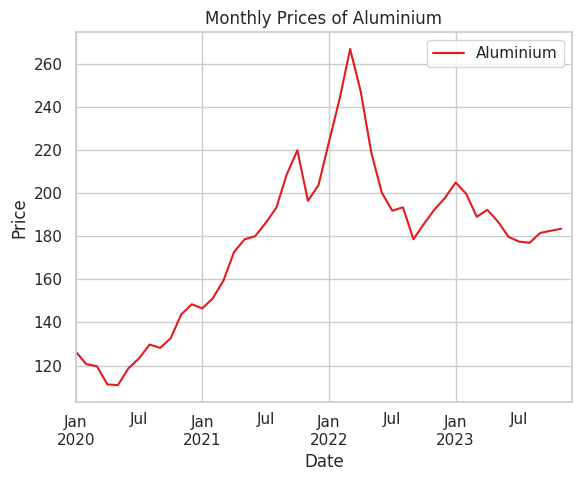

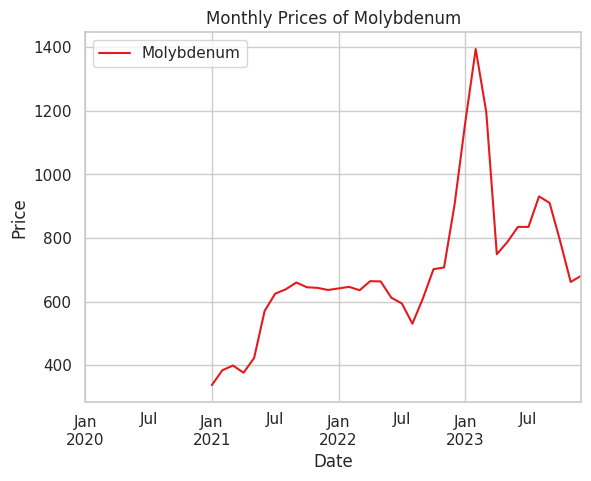

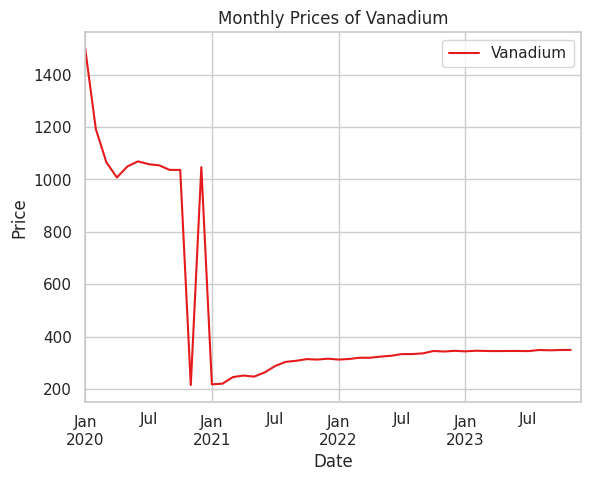

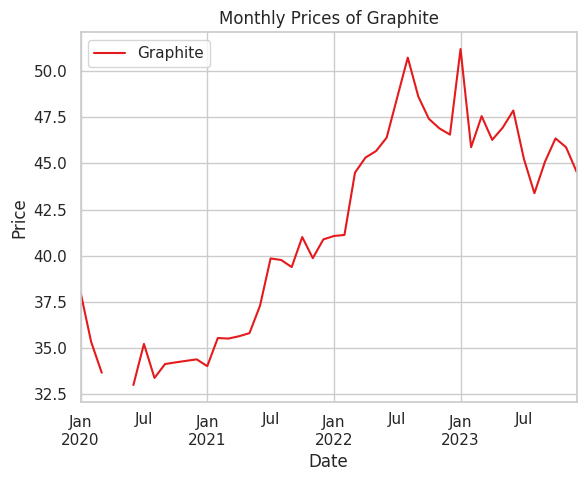

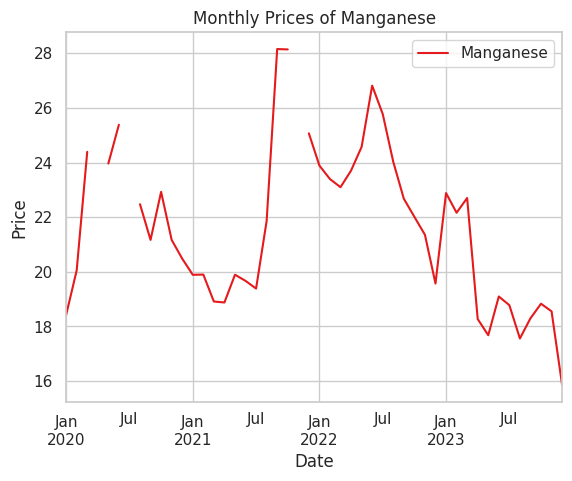

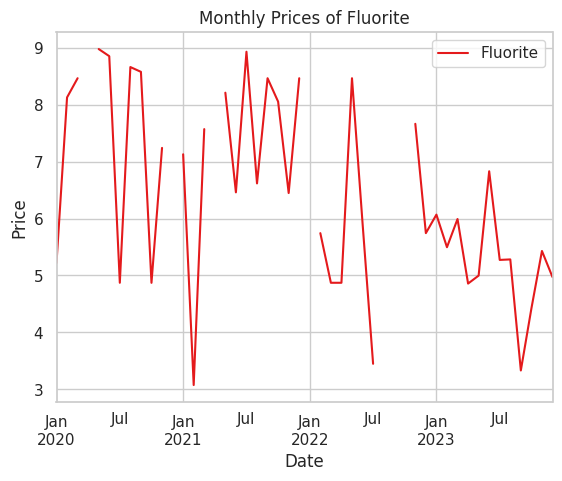

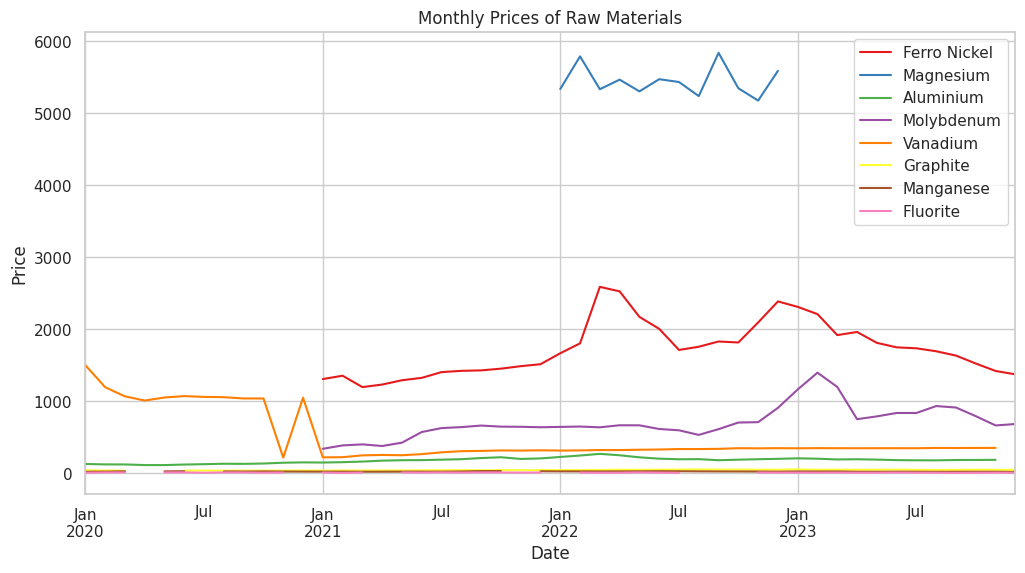

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Raw material/Raw Material(Minerals&Metals).csv')

# Convert the 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')

# Set the 'Month' column as the index
data = data.set_index('Month')

# Create a line chart for each raw material
for material in data.columns:
    plt.figure()
    data[material].plot(label=material)
    plt.title(f"Monthly Prices of {material}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

# Create a single line chart for all raw materials
plt.figure(figsize=(12, 6))
for material in data.columns:
    data[material].plot(label=material)
plt.title("Monthly Prices of Raw Materials")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Bar Chart

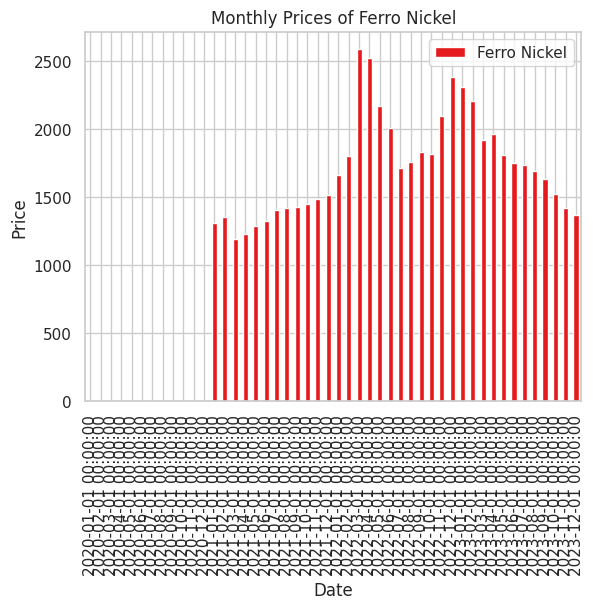

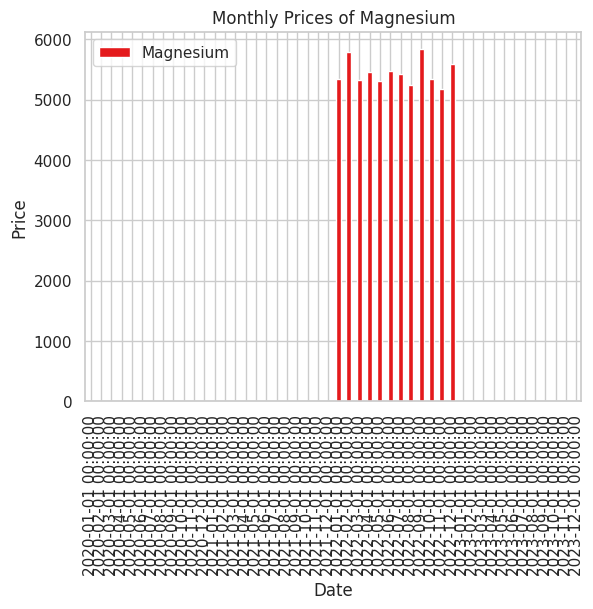

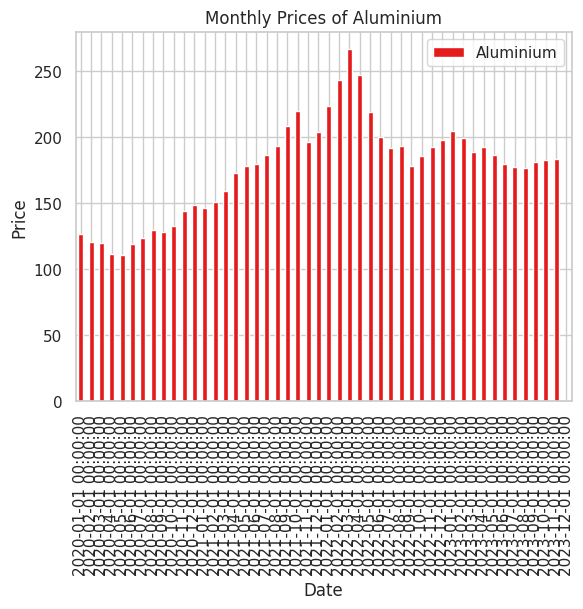

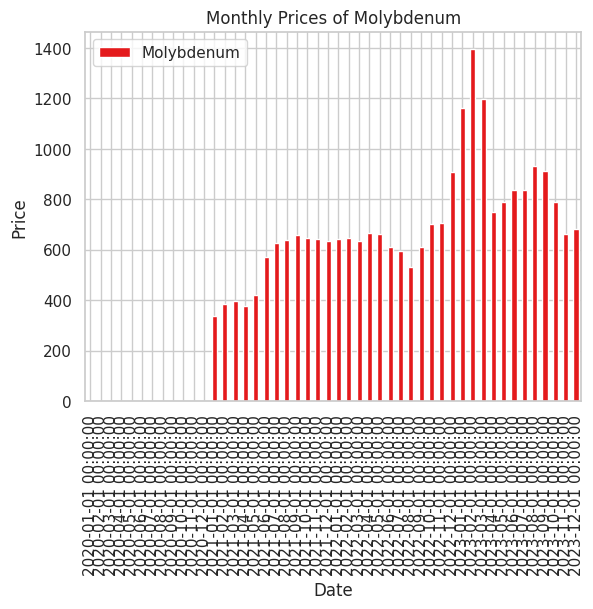

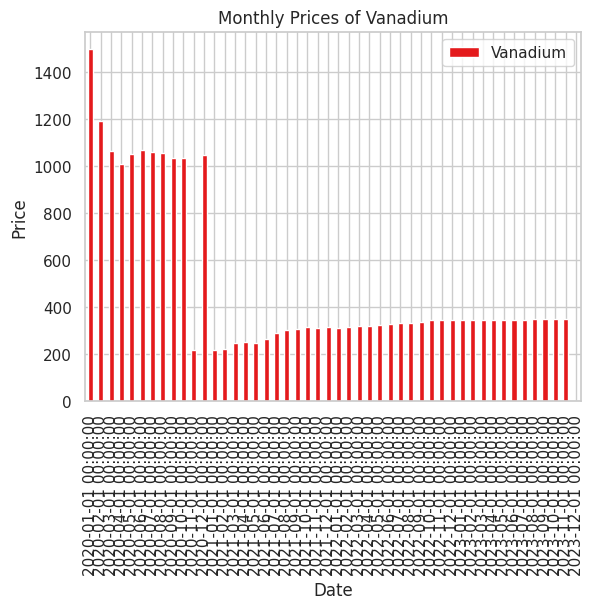

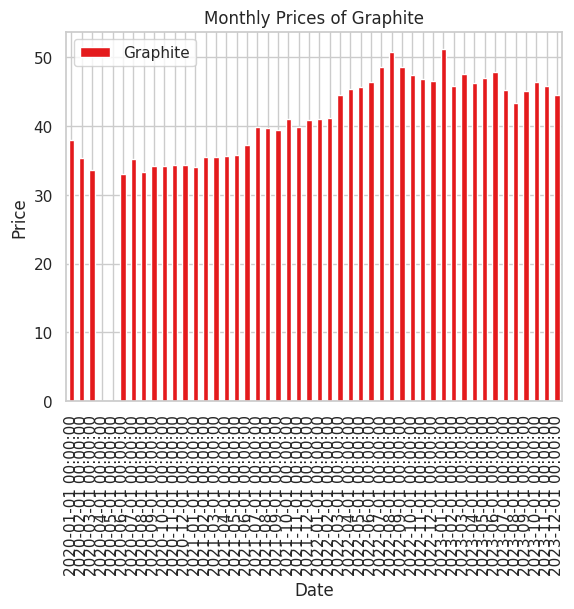

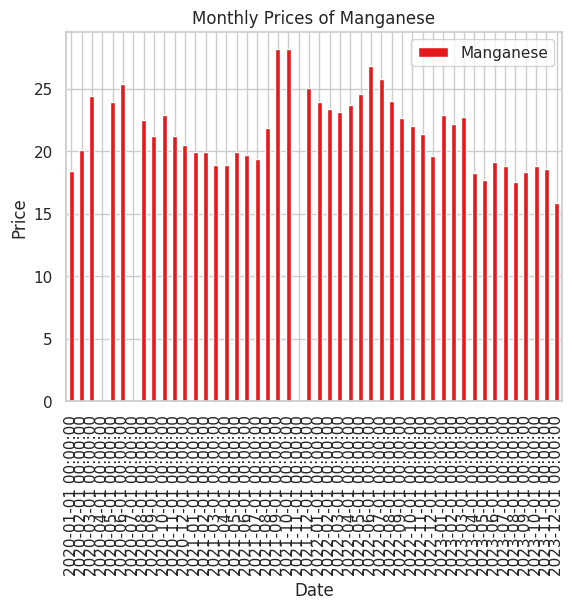

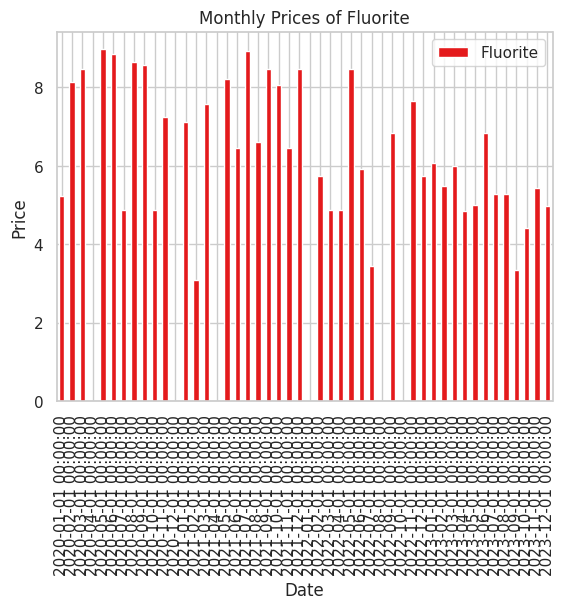

<Figure size 1200x600 with 0 Axes>

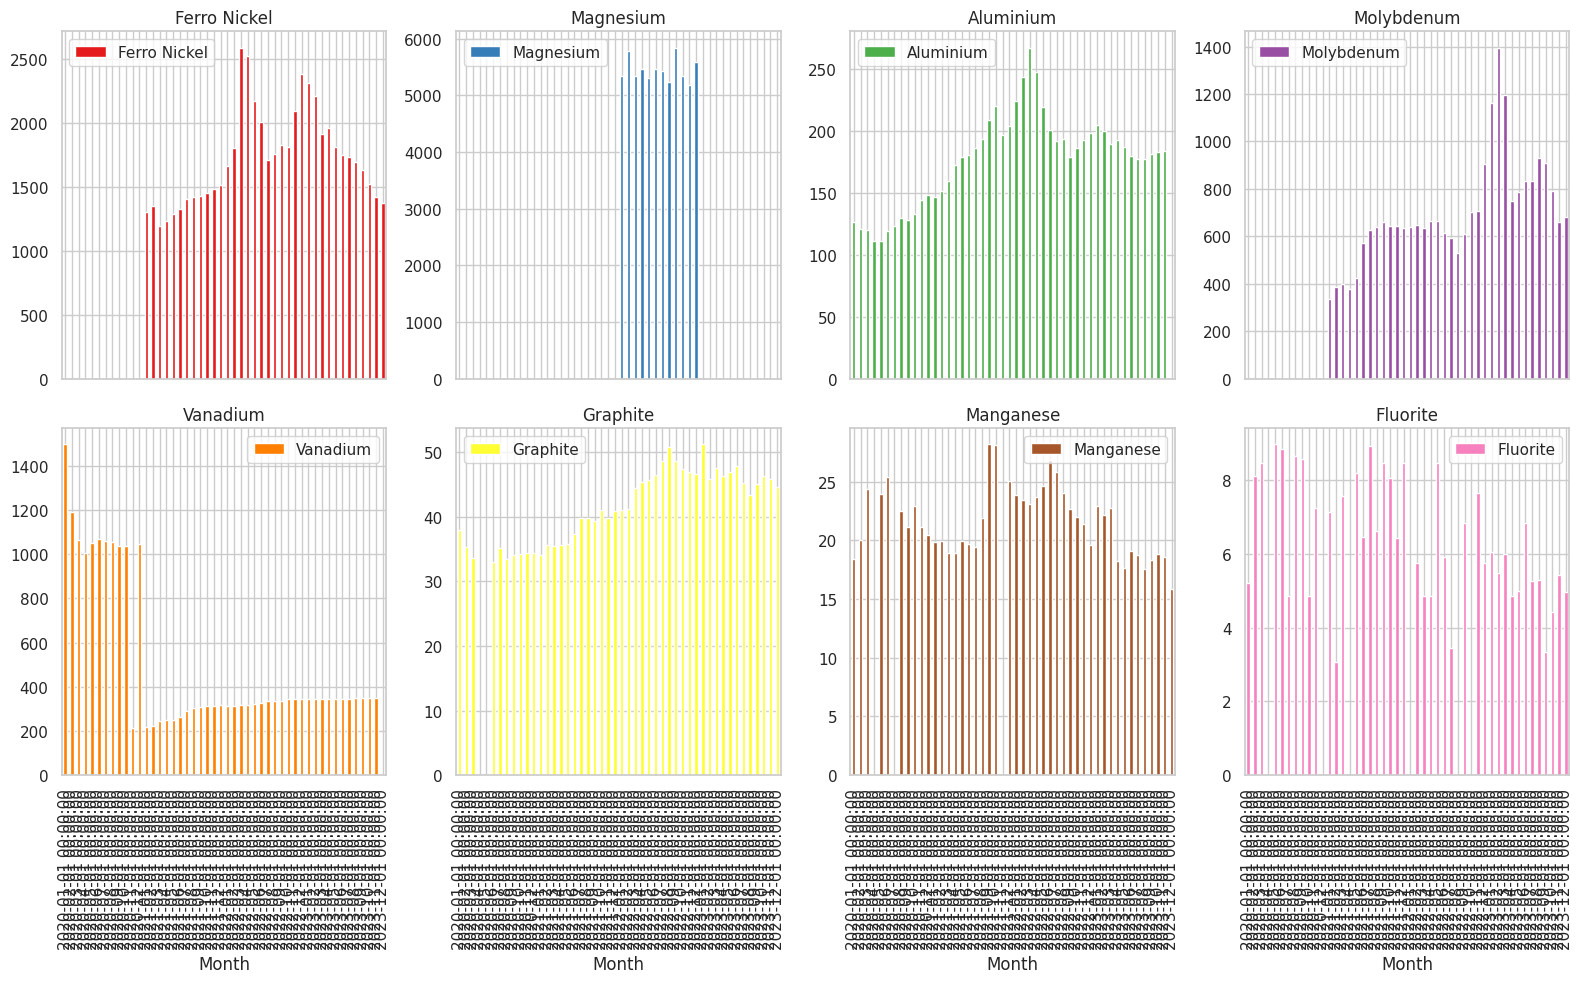

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Raw material/Raw Material(Minerals&Metals).csv')

# Convert the 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')

# Set the 'Month' column as the index
data = data.set_index('Month')

# Create a bar chart for each raw material
for material in data.columns:
    plt.figure()
    data[material].plot(kind='bar', label=material)
    plt.title(f"Monthly Prices of {material}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

# Create a grouped bar chart for all raw materials
plt.figure(figsize=(12, 6))
data.plot(kind='bar', subplots=True, layout=(2, 4), figsize=(16, 10))
plt.tight_layout()
plt.show()

Scatter plot



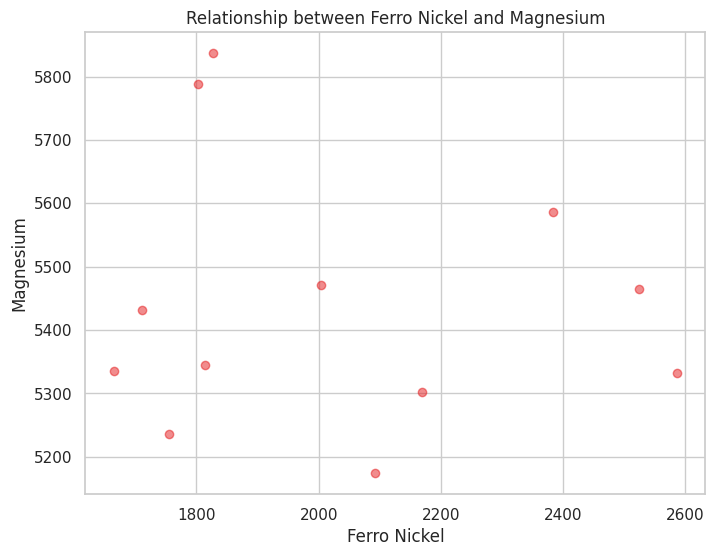

<Figure size 1200x1000 with 0 Axes>

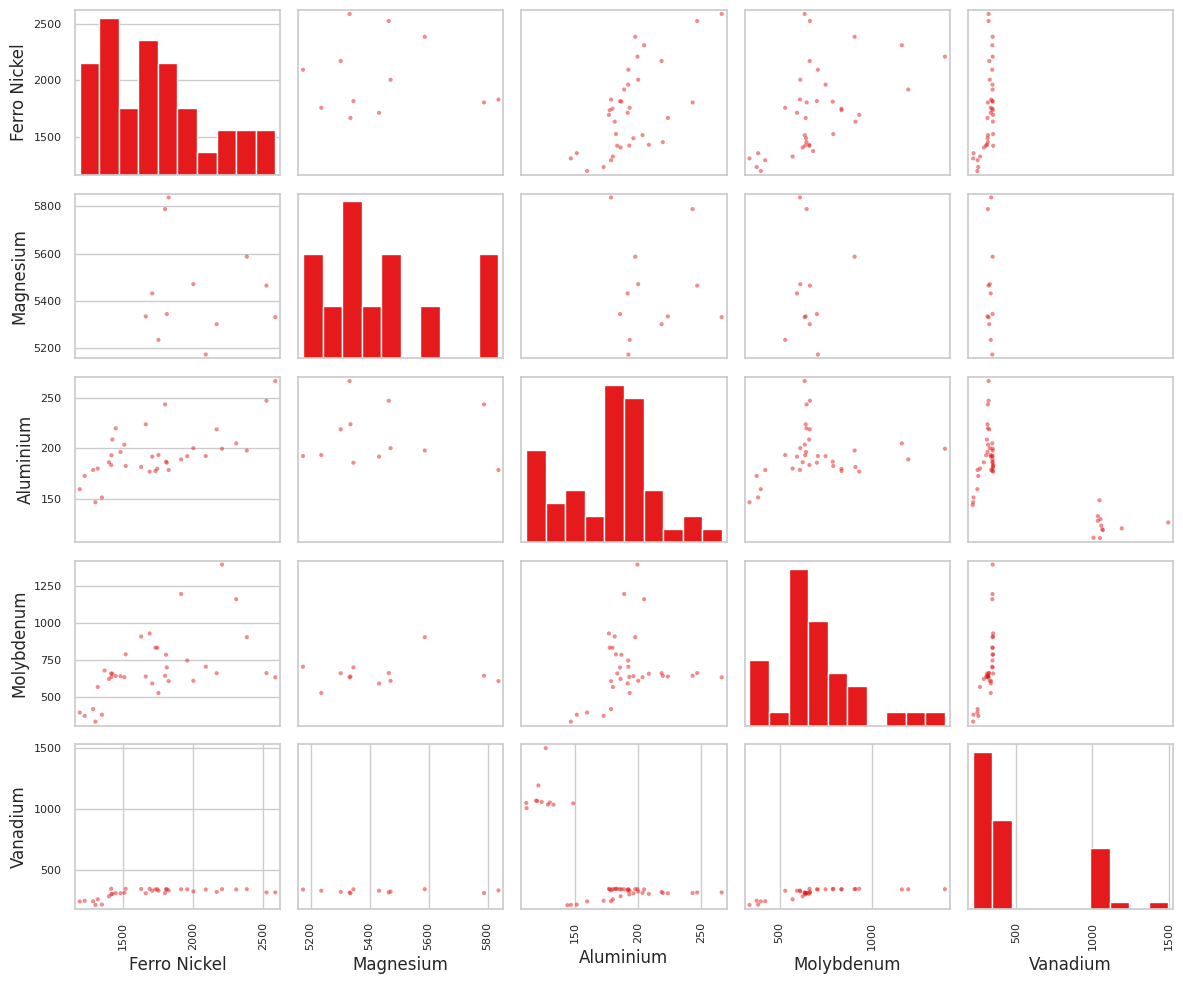

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Raw material/Raw Material(Minerals&Metals).csv')

# Convert the 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')

# Set the 'Month' column as the index
data = data.set_index('Month')

# Create a scatter plot for two raw materials
material1 = 'Ferro Nickel'
material2 = 'Magnesium'

plt.figure(figsize=(8, 6))
plt.scatter(data[material1], data[material2], alpha=0.5)
plt.title(f"Relationship between {material1} and {material2}")
plt.xlabel(material1)
plt.ylabel(material2)
plt.show()

# Create a scatter plot matrix for all raw materials
plt.figure(figsize=(12, 10))
pd.plotting.scatter_matrix(data.iloc[:, :5], figsize=(12, 10))
plt.tight_layout()
plt.show()

Area Chart

In [ ]:
import pandas as pd
import plotly.express as px

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Raw material/Raw Material(Minerals&Metals).csv')

# Convert the 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')

# Set the 'Month' column as the index
data = data.set_index('Month')

# Melt the data for the area chart
melted_data = data.reset_index().melt(id_vars='Month', var_name='Raw Material', value_name='Price')

# Create the area chart
fig = px.area(melted_data, x='Month', y='Price', color='Raw Material')

# Customize the layout
fig.update_layout(
    title='Monthly Prices of Raw Materials',
    xaxis_title='Month',
    yaxis_title='Price',
    legend_title='Raw Material',
    font=dict(size=14)
)

# Display the area chart
fig.show()

In [ ]:
!pip install dash

In [ ]:
import pandas as pd
import plotly.graph_objs as go
import dash
import dash_core_components as dcc
import dash_html_components as html

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Raw material/Raw Material(Minerals&Metals).csv')

# Convert the 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')

# Set the 'Month' column as the index
data = data.set_index('Month')

# Create the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1('Raw Materials Price Dashboard'),
    dcc.Dropdown(
        id='material-dropdown',
        options=[{'label': col, 'value': col} for col in data.columns],
        value=data.columns[0],
        multi=False,
        clearable=False
    ),
    dcc.Graph(id='price-chart')
])

# Define the callback function
@app.callback(
    dash.dependencies.Output('price-chart', 'figure'),
    [dash.dependencies.Input('material-dropdown', 'value')]
)
def update_chart(selected_material):
    trace = go.Scatter(
        x=data.index,
        y=data[selected_material],
        mode='lines',
        name=selected_material
    )
    layout = go.Layout(
        title=f'Monthly Prices of {selected_material}',
        xaxis=dict(title='Date'),
        yaxis=dict(title='Price')
    )
    return go.Figure(data=[trace], layout=layout)

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

Violin Plot

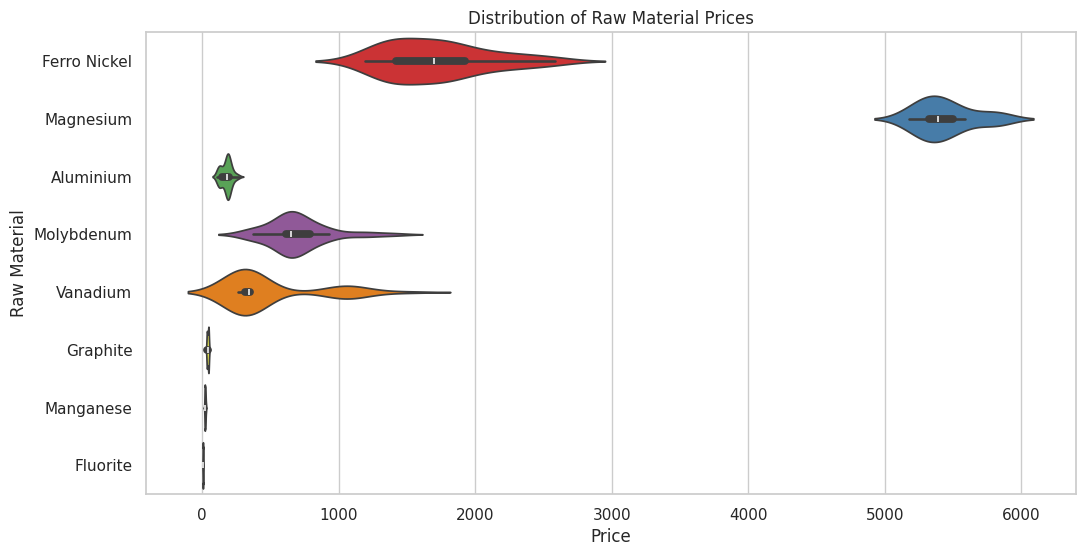

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Raw material/Raw Material(Minerals&Metals).csv')

# Convert the 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')

# Set the 'Month' column as the index
data = data.set_index('Month')

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, orient='h')
plt.title("Distribution of Raw Material Prices")
plt.xlabel("Price")
plt.ylabel("Raw Material")
plt.show()

Box Plot

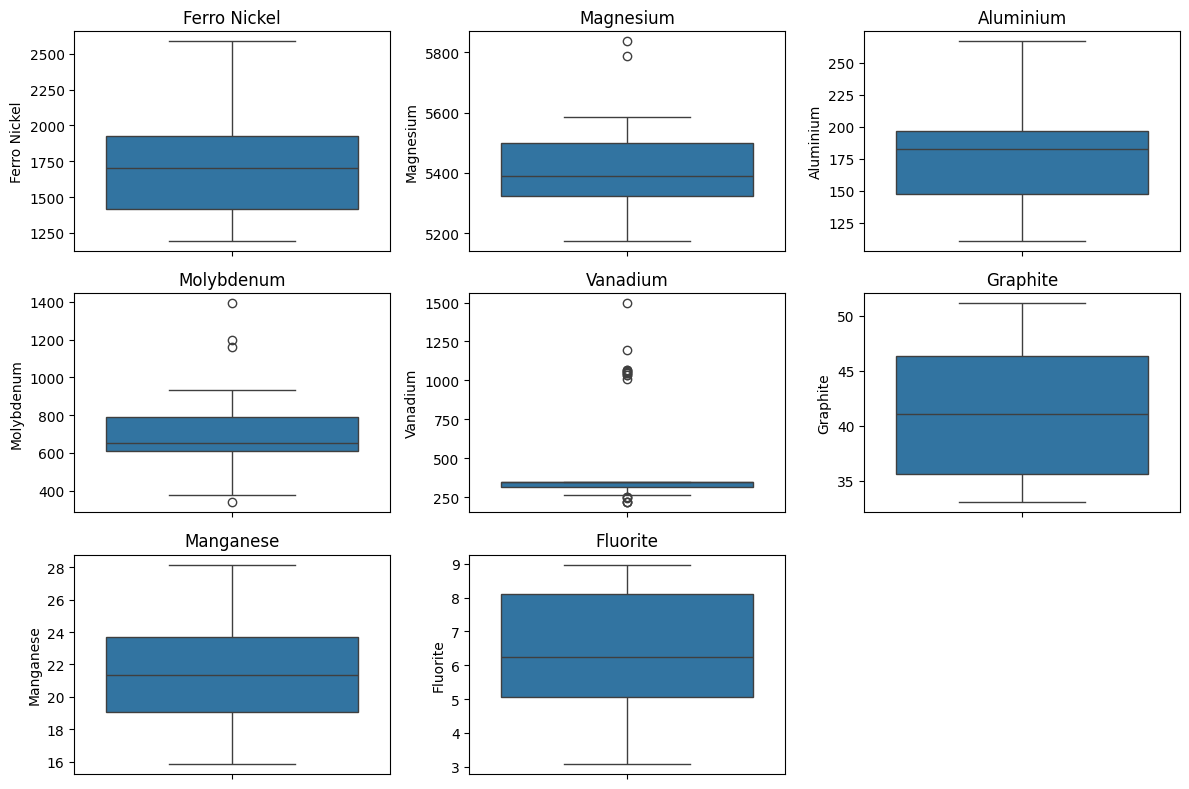

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Raw material/Raw Material(Minerals&Metals).csv')

# Convert the 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')

# Set the 'Month' column as the index
data = data.set_index('Month')

# Create a box plot for each raw material
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=data[col], orient='v')
    plt.title(col)
    plt.tight_layout()

plt.show()

Data Preprocessing

Handling duplicates:

If the dataset has multiple entries of the same record then we can remove the duplicate entries. In our dataset we dont have duplicates. In case of duplicates we will use function drop_duplicates()

In [4]:
df.duplicated().sum()

0

In [5]:
duplicate = df.duplicated()  # Returns Boolean Series denoting duplicate rows.
duplicate
sum(duplicate)

0

In [6]:
# Removing Duplicates
df = df.drop_duplicates() # Returns DataFrame with duplicate rows removed.

Missing Value Analysis

IMPUTATION:

The process of dealing with missing values is called Imputation.

Most popular substitution based Imputation techniques are:

1) Mean imputation for numeric data

2) Mode imputation for non-numeric data

In [7]:
df.isnull().sum() # Check for missing values

Month            0
Ferro Nickel    12
Magnesium       36
Aluminium        1
Molybdenum      12
Vanadium         1
Graphite         2
Manganese        3
Fluorite         6
dtype: int64

In [8]:
nul_data = pd.isnull(df['Ferro Nickel'])
# print only the data, Customers = NaN
df[nul_data]

Month  Ferro Nickel  Magnesium  Aluminium  Molybdenum  Vanadium  \
0   Jan-20           NaN        NaN   126.4699         NaN  1497.500   
1   Feb-20           NaN        NaN   120.6124         NaN  1192.880   
2   Mar-20           NaN        NaN   119.7152         NaN  1065.580   
3   Apr-20           NaN        NaN   111.2309         NaN  1007.480   
4   May-20           NaN        NaN   110.9454         NaN  1049.740   
5   Jun-20           NaN        NaN   118.7544         NaN  1068.940   
6   Jul-20           NaN        NaN   123.3156         NaN  1058.220   
7   Aug-20           NaN        NaN   129.7245         NaN  1053.910   
8   Sep-20           NaN        NaN   128.1651         NaN  1036.320   
9   Oct-20           NaN        NaN   132.7034         NaN  1036.320   
10  Nov-20           NaN        NaN   143.7289         NaN   215.461   
11  Dec-20           NaN        NaN   148.3963         NaN  1046.960   

    Graphite  Manganese  Fluorite  
0     38.000     18.420     5.220  
1     35.332     20.050     8.125  
2     33.667     24.394     8.462  
3        NaN        NaN       NaN  
4        NaN     23.966     8.974  
5     33.000     25.385     8.849  
6     35.227        NaN     4.872  
7     33.385     22.474     8.658  
8     34.137     21.168     8.574  
9     34.227     22.927     4.871  
10    34.310     21.168     7.239  
11    34.390     20.482       NaN

In [9]:
# Mean Imputer in Ferro Nickel
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df["Ferro Nickel"] = pd.DataFrame(mean_imputer.fit_transform(df[["Ferro Nickel"]]))
df["Ferro Nickel"].isna().sum()

0

In [10]:
df.isnull().sum()

Month            0
Ferro Nickel     0
Magnesium       36
Aluminium        1
Molybdenum      12
Vanadium         1
Graphite         2
Manganese        3
Fluorite         6
dtype: int64

In [11]:
# On the Magnesium column of our data, impute the missing values with the LOCF( Forword Filling & Back Ward Filling )
df['Magnesium']= df['Magnesium'].fillna(method ='ffill')
df['Magnesium']= df['Magnesium'].fillna(method ='bfill')
df["Magnesium"].isna().sum()  # all records replaced by

0

In [12]:
df.isnull().sum()

Month            0
Ferro Nickel     0
Magnesium        0
Aluminium        1
Molybdenum      12
Vanadium         1
Graphite         2
Manganese        3
Fluorite         6
dtype: int64

In [13]:
# Mode Imputer For Molybdenum
mode_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df["Molybdenum"] = pd.DataFrame(mode_imputer.fit_transform(df[["Molybdenum"]]))
df["Molybdenum"].isna().sum()

0

In [14]:
df.isnull().sum()

Month           0
Ferro Nickel    0
Magnesium       0
Aluminium       1
Molybdenum      0
Vanadium        1
Graphite        2
Manganese       3
Fluorite        6
dtype: int64

In [15]:
# Median Imputer for Aluminium
median_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
df["Aluminium"] = pd.DataFrame(median_imputer.fit_transform(df[["Aluminium"]]))
df["Aluminium"].isna().sum()  # all records replaced by median

0

In [16]:
df.isnull().sum()

Month           0
Ferro Nickel    0
Magnesium       0
Aluminium       0
Molybdenum      0
Vanadium        1
Graphite        2
Manganese       3
Fluorite        6
dtype: int64

In [17]:
# Mean Imputer for Vanadium
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df["Vanadium"] = pd.DataFrame(mean_imputer.fit_transform(df[["Vanadium"]]))
df["Vanadium"].isna().sum()

0

In [18]:
df.isnull().sum()

Month           0
Ferro Nickel    0
Magnesium       0
Aluminium       0
Molybdenum      0
Vanadium        0
Graphite        2
Manganese       3
Fluorite        6
dtype: int64

In [19]:
# Mode Imputer For Graphite
mode_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df["Graphite"] = mode_imputer.fit_transform(df[["Graphite"]]).ravel()
df["Graphite"].isna().sum()

0

In [20]:
df.isnull().sum()

Month           0
Ferro Nickel    0
Magnesium       0
Aluminium       0
Molybdenum      0
Vanadium        0
Graphite        0
Manganese       3
Fluorite        6
dtype: int64

In [21]:
# Median Imputer for Manganese
median_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
df["Manganese"] = pd.DataFrame(median_imputer.fit_transform(df[["Manganese"]]))
df["Manganese"].isna().sum()  # all records replaced by median

0

In [22]:
df.isnull().sum()

Month           0
Ferro Nickel    0
Magnesium       0
Aluminium       0
Molybdenum      0
Vanadium        0
Graphite        0
Manganese       0
Fluorite        6
dtype: int64

In [23]:
# Mode Imputer For Fluorite
mode_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df["Fluorite"] = pd.DataFrame(mode_imputer.fit_transform(df[["Fluorite"]]))
df["Fluorite"].isna().sum()

0

In [24]:
df.isnull().sum()

Month           0
Ferro Nickel    0
Magnesium       0
Aluminium       0
Molybdenum      0
Vanadium        0
Graphite        0
Manganese       0
Fluorite        0
dtype: int64

Data type conversion for Month column

In [25]:
# Check the current data types
print("Current data types:")
print(df.dtypes)

Current data types:
Month            object
Ferro Nickel    float64
Magnesium       float64
Aluminium       float64
Molybdenum      float64
Vanadium        float64
Graphite        float64
Manganese       float64
Fluorite        float64
dtype: object


In [26]:
# Convert data types
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')

In [27]:
# Convert numerical columns to float
numerical_cols = ['Ferro Nickel', 'Magnesium', 'Aluminium', 'Molybdenum', 'Vanadium', 'Graphite', 'Manganese', 'Fluorite']
for col in numerical_cols:
    df[col] = df[col].astype(float)

In [28]:
# Check the updated data types
print("\nUpdated data types:")
print(df.dtypes)


Updated data types:
Month           datetime64[ns]
Ferro Nickel           float64
Magnesium              float64
Aluminium              float64
Molybdenum             float64
Vanadium               float64
Graphite               float64
Manganese              float64
Fluorite               float64
dtype: object


In [ ]:

df

Month  Ferro Nickel  Magnesium  Aluminium  Molybdenum     Vanadium  \
0  2020-01-01   1723.283167     5335.0   126.4699     834.840  1497.500000   
1  2020-02-01   1723.283167     5335.0   120.6124     834.840  1192.880000   
2  2020-03-01   1723.283167     5335.0   119.7152     834.840  1065.580000   
3  2020-04-01   1723.283167     5335.0   111.2309     834.840  1007.480000   
4  2020-05-01   1723.283167     5335.0   110.9454     834.840  1049.740000   
5  2020-06-01   1723.283167     5335.0   118.7544     834.840  1068.940000   
6  2020-07-01   1723.283167     5335.0   123.3156     834.840  1058.220000   
7  2020-08-01   1723.283167     5335.0   129.7245     834.840  1053.910000   
8  2020-09-01   1723.283167     5335.0   128.1651     834.840  1036.320000   
9  2020-10-01   1723.283167     5335.0   132.7034     834.840  1036.320000   
10 2020-11-01   1723.283167     5335.0   143.7289     834.840   215.461000   
11 2020-12-01   1723.283167     5335.0   148.3963     834.840  1046.960000   
12 2021-01-01   1305.933000     5335.0   146.5060     337.190   218.040000   
13 2021-02-01   1352.305000     5335.0   151.2500     384.082   220.678000   
14 2021-03-01   1194.287000     5335.0   159.4512     398.584   245.941000   
15 2021-04-01   1229.486000     5335.0   172.6054     376.034   251.740000   
16 2021-05-01   1289.421000     5335.0   178.5194     422.101   247.626000   
17 2021-06-01   1322.546000     5335.0   179.9713     570.509   263.522000   
18 2021-07-01   1402.374000     5335.0   186.1266     624.785   288.269000   
19 2021-08-01   1419.888000     5335.0   193.0879     638.448   303.911000   
20 2021-09-01   1426.430000     5335.0   208.6662     659.891   308.140000   
21 2021-10-01   1450.310000     5335.0   219.7959     644.907   314.420000   
22 2021-11-01   1484.661000     5335.0   196.3709     643.010   312.620000   
23 2021-12-01   1511.960000     5335.0   203.6184     636.320   316.090000   
24 2022-01-01   1664.323000     5335.0   223.7903     641.220   312.620000   
25 2022-02-01   1801.940000     5788.0   243.5388     646.270   314.920000   
26 2022-03-01   2586.531000     5332.0   266.7314     635.580   319.660000   
27 2022-04-01   2524.110000     5465.0   247.1648     664.110   319.660000   
28 2022-05-01   2169.492000     5302.0   218.8097     663.180   324.080000   
29 2022-06-01   2003.383000     5471.0   200.1491     612.100   327.220000   
30 2022-07-01   1710.373000     5432.0   191.7567     593.980   333.680000   
31 2022-08-01   1754.777000     5236.0   193.3816     530.350   333.680000   
32 2022-09-01   1827.558000     5837.0   178.5318     610.110   336.330000   
33 2022-10-01   1814.031000     5345.0   185.7051     701.800   345.410000   
34 2022-11-01   2091.737000     5174.0   192.3540     707.200   343.400000   
35 2022-12-01   2384.098000     5587.0   197.8064     905.800   346.030000   
36 2023-01-01   2308.828000     5587.0   204.8715    1161.390   344.030000   
37 2023-02-01   2207.842000     5587.0   199.5867    1394.520   346.370000   
38 2023-03-01   1916.474000     5587.0   188.9778    1196.170   345.470000   
39 2023-04-01   1959.851000     5587.0   192.1936     748.800   345.030000   
40 2023-05-01   1808.888000     5587.0   186.7807     787.420   345.410000   
41 2023-06-01   1746.441000     5587.0   179.6961     834.840   345.470000   
42 2023-07-01   1733.212000     5587.0   177.4797     834.840   345.030000   
43 2023-08-01   1692.022000     5587.0   176.8768     930.840   349.100000   
44 2023-09-01   1631.655000     5587.0   181.4555     910.410   348.040000   
45 2023-10-01   1521.626000     5587.0   182.4672     790.290   349.100000   
46 2023-11-01   1418.224000     5587.0   183.4281     661.590   349.540000   
47 2023-12-01   1371.177000     5587.0   182.4672     681.250   497.650809   

    Graphite  Manganese  Fluorite  
0     38.000     18.420     5.220  
1     35.332     20.050     8.125  
2     33.667     24.394     8.462  
3     33.000     21.356     8.462  
4    

Outlier detection

Box Plot

Visualize numeric data using boxplot for outliers

In [ ]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 68.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.1 which is incompatible.


In [ ]:
import seaborn as sns
import pandas as pd

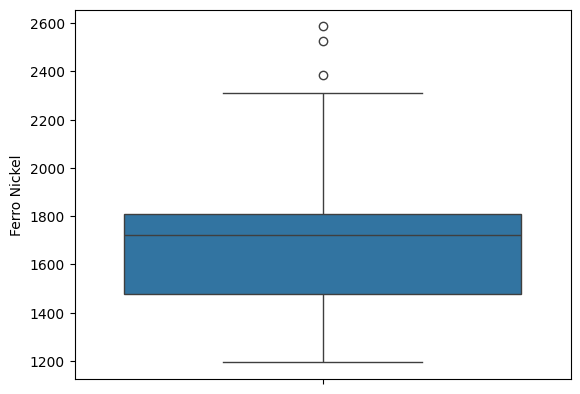

In [ ]:
# !pip install feature-engine
# Let's find outliers in Ferro Nickel
sns.boxplot(df["Ferro Nickel"])

# Detection of outliers
IQR = df['Ferro Nickel'].quantile(0.75) - df['Ferro Nickel'].quantile(0.25)

lower_limit = df['Ferro Nickel'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Ferro Nickel'].quantile(0.75) + (IQR * 1.5)

In [ ]:
# Winsorization for "Ferro Nickel" column
from feature_engine.outliers import Winsorizer

# Define the model with IQR method
winsor_iqr = Winsorizer(capping_method = 'iqr',
                         tail = 'both', # cap left, right or both tails
                          fold = 1.5,
                          variables = ['Ferro Nickel'])

df_s = winsor_iqr.fit_transform(df[['Ferro Nickel']])

<Axes: ylabel='Ferro Nickel'>

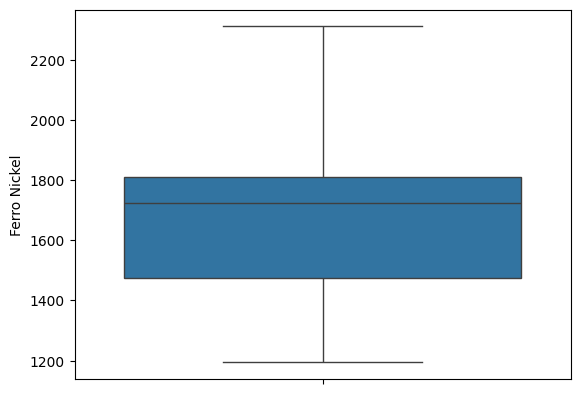

In [ ]:
# Let's see boxplot of Ferro Nickel
sns.boxplot(df_s["Ferro Nickel"])

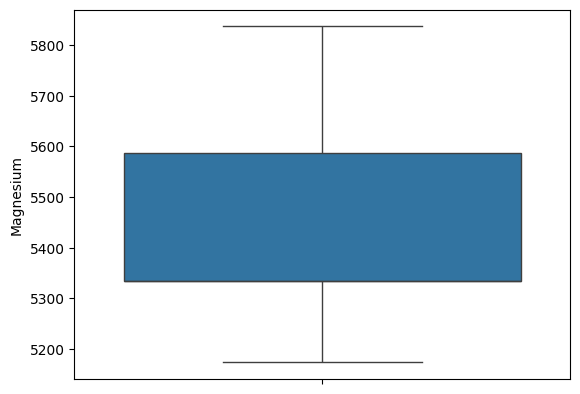

In [ ]:
# Let's find outliers in Magnesium
sns.boxplot(df["Magnesium"])

# Detection of outliers (find limits for salary based on IQR)
IQR = df['Magnesium'].quantile(0.75) - df['Magnesium'].quantile(0.25)

lower_limit = df['Magnesium'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Magnesium'].quantile(0.75) + (IQR * 1.5)
# There is no outlaiers

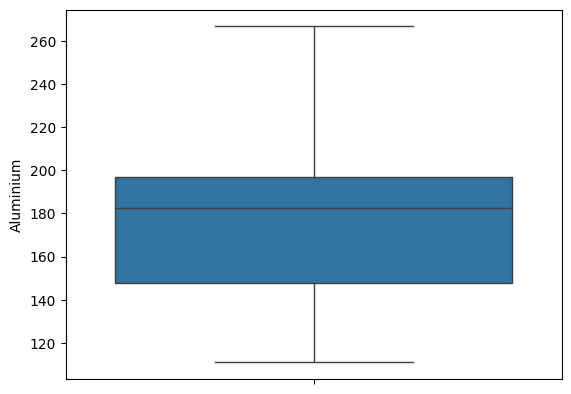

In [ ]:
# Let's find outliers in Aluminium
sns.boxplot(df["Aluminium"])

# Detection of outliers (find limits for salary based on IQR)
IQR = df['Aluminium'].quantile(0.75) - df['Aluminium'].quantile(0.25)

lower_limit = df['Aluminium'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Aluminium'].quantile(0.75) + (IQR * 1.5)
# There is no outlier here

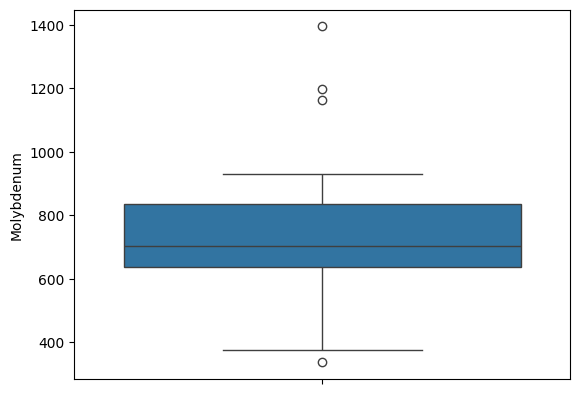

In [ ]:
# Let's find outliers in Molybdenum
sns.boxplot(df["Molybdenum"])

# Detection of outliers (find limits for salary based on IQR)
IQR = df['Molybdenum'].quantile(0.75) - df['Molybdenum'].quantile(0.25)

lower_limit = df['Molybdenum'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Molybdenum'].quantile(0.75) + (IQR * 1.5)

In [ ]:
from feature_engine.outliers import Winsorizer

# Define the model with IQR method
winsor_iqr = Winsorizer(capping_method = 'iqr',
                        # choose  IQR rule boundaries or gaussian for mean and std
                          tail = 'both', # cap left, right or both tails
                          fold = 1.5,
                          variables = ['Molybdenum'])

df_s = winsor_iqr.fit_transform(df[['Molybdenum']])

<Axes: ylabel='Molybdenum'>

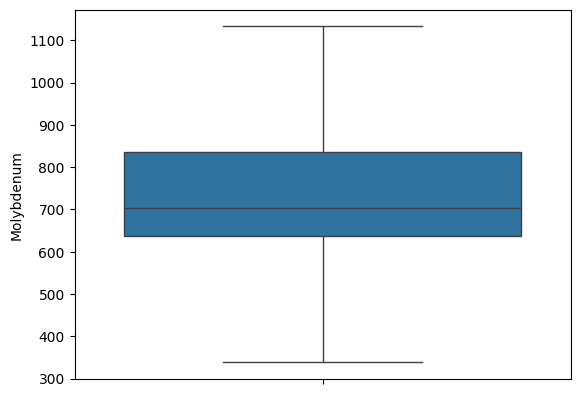

In [ ]:
# Let's see boxplot
sns.boxplot(df_s.Molybdenum)

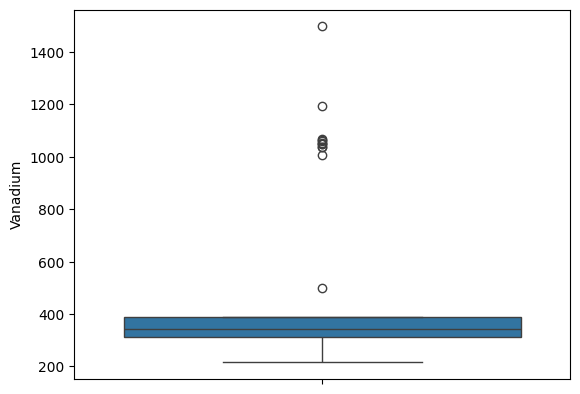

In [ ]:
# Let's find outliers in Vanadium
sns.boxplot(df["Vanadium"])

# Detection of outliers (find limits for salary based on IQR)
IQR = df['Vanadium'].quantile(0.75) - df['Vanadium'].quantile(0.25)

lower_limit = df['Vanadium'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Vanadium'].quantile(0.75) + (IQR * 1.5)


In [ ]:
# Define the model with IQR method for vanadium
winsor_iqr = Winsorizer(capping_method = 'iqr',
                        tail = 'both', # cap left, right or both tails
                          fold = 1.5,
                          variables = ['Vanadium'])

df_s = winsor_iqr.fit_transform(df[['Vanadium']])

<Axes: ylabel='Vanadium'>

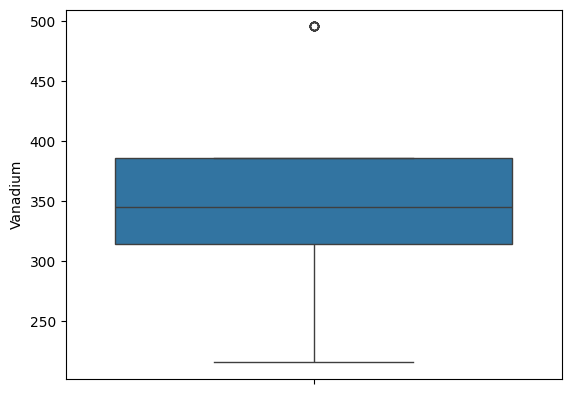

In [ ]:
sns.boxplot(df_s.Vanadium)

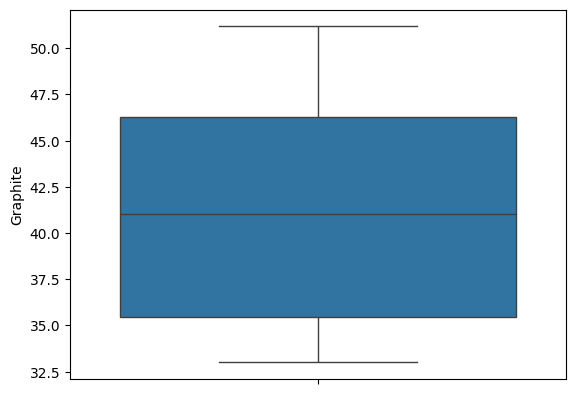

In [ ]:
# Let's find outliers in Graphite
sns.boxplot(df["Graphite"])

# Detection of outliers (find limits for salary based on IQR)
IQR = df['Graphite'].quantile(0.75) - df['Graphite'].quantile(0.25)

lower_limit = df['Graphite'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Graphite'].quantile(0.75) + (IQR * 1.5)
# There is no outlier here

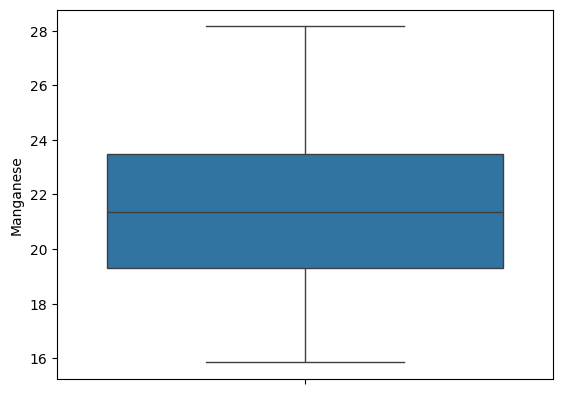

In [ ]:
# Let's find outliers in Manganese
sns.boxplot(df["Manganese"])

# Detection of outliers (find limits for salary based on IQR)
IQR = df['Manganese'].quantile(0.75) - df['Manganese'].quantile(0.25)

lower_limit = df['Manganese'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Manganese'].quantile(0.75) + (IQR * 1.5)
# There is no outliers here

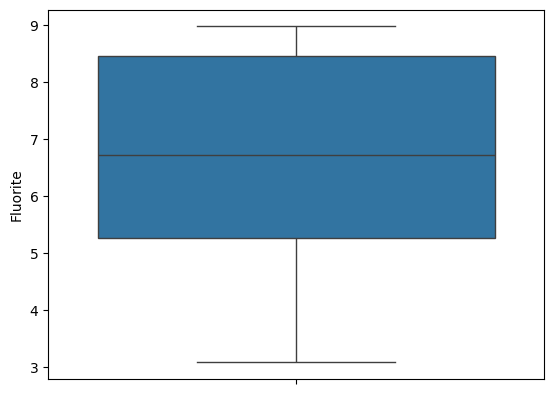

In [ ]:
# Let's find outliers in Fluorite
sns.boxplot(df["Fluorite"])

# Detection of outliers (find limits for salary based on IQR)
IQR = df['Fluorite'].quantile(0.75) - df['Fluorite'].quantile(0.25)

lower_limit = df['Fluorite'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Fluorite'].quantile(0.75) + (IQR * 1.5)
# There is no outlier here

In [ ]:
df

Month  Ferro Nickel  Magnesium  Aluminium  Molybdenum     Vanadium  \
0  2020-01-01   1723.283167     5335.0   126.4699     834.840  1497.500000   
1  2020-02-01   1723.283167     5335.0   120.6124     834.840  1192.880000   
2  2020-03-01   1723.283167     5335.0   119.7152     834.840  1065.580000   
3  2020-04-01   1723.283167     5335.0   111.2309     834.840  1007.480000   
4  2020-05-01   1723.283167     5335.0   110.9454     834.840  1049.740000   
5  2020-06-01   1723.283167     5335.0   118.7544     834.840  1068.940000   
6  2020-07-01   1723.283167     5335.0   123.3156     834.840  1058.220000   
7  2020-08-01   1723.283167     5335.0   129.7245     834.840  1053.910000   
8  2020-09-01   1723.283167     5335.0   128.1651     834.840  1036.320000   
9  2020-10-01   1723.283167     5335.0   132.7034     834.840  1036.320000   
10 2020-11-01   1723.283167     5335.0   143.7289     834.840   215.461000   
11 2020-12-01   1723.283167     5335.0   148.3963     834.840  1046.960000   
12 2021-01-01   1305.933000     5335.0   146.5060     337.190   218.040000   
13 2021-02-01   1352.305000     5335.0   151.2500     384.082   220.678000   
14 2021-03-01   1194.287000     5335.0   159.4512     398.584   245.941000   
15 2021-04-01   1229.486000     5335.0   172.6054     376.034   251.740000   
16 2021-05-01   1289.421000     5335.0   178.5194     422.101   247.626000   
17 2021-06-01   1322.546000     5335.0   179.9713     570.509   263.522000   
18 2021-07-01   1402.374000     5335.0   186.1266     624.785   288.269000   
19 2021-08-01   1419.888000     5335.0   193.0879     638.448   303.911000   
20 2021-09-01   1426.430000     5335.0   208.6662     659.891   308.140000   
21 2021-10-01   1450.310000     5335.0   219.7959     644.907   314.420000   
22 2021-11-01   1484.661000     5335.0   196.3709     643.010   312.620000   
23 2021-12-01   1511.960000     5335.0   203.6184     636.320   316.090000   
24 2022-01-01   1664.323000     5335.0   223.7903     641.220   312.620000   
25 2022-02-01   1801.940000     5788.0   243.5388     646.270   314.920000   
26 2022-03-01   2586.531000     5332.0   266.7314     635.580   319.660000   
27 2022-04-01   2524.110000     5465.0   247.1648     664.110   319.660000   
28 2022-05-01   2169.492000     5302.0   218.8097     663.180   324.080000   
29 2022-06-01   2003.383000     5471.0   200.1491     612.100   327.220000   
30 2022-07-01   1710.373000     5432.0   191.7567     593.980   333.680000   
31 2022-08-01   1754.777000     5236.0   193.3816     530.350   333.680000   
32 2022-09-01   1827.558000     5837.0   178.5318     610.110   336.330000   
33 2022-10-01   1814.031000     5345.0   185.7051     701.800   345.410000   
34 2022-11-01   2091.737000     5174.0   192.3540     707.200   343.400000   
35 2022-12-01   2384.098000     5587.0   197.8064     905.800   346.030000   
36 2023-01-01   2308.828000     5587.0   204.8715    1161.390   344.030000   
37 2023-02-01   2207.842000     5587.0   199.5867    1394.520   346.370000   
38 2023-03-01   1916.474000     5587.0   188.9778    1196.170   345.470000   
39 2023-04-01   1959.851000     5587.0   192.1936     748.800   345.030000   
40 2023-05-01   1808.888000     5587.0   186.7807     787.420   345.410000   
41 2023-06-01   1746.441000     5587.0   179.6961     834.840   345.470000   
42 2023-07-01   1733.212000     5587.0   177.4797     834.840   345.030000   
43 2023-08-01   1692.022000     5587.0   176.8768     930.840   349.100000   
44 2023-09-01   1631.655000     5587.0   181.4555     910.410   348.040000   
45 2023-10-01   1521.626000     5587.0   182.4672     790.290   349.100000   
46 2023-11-01   1418.224000     5587.0   183.4281     661.590   349.540000   
47 2023-12-01   1371.177000     5587.0   182.4672     681.250   497.650809   

    Graphite  Manganese  Fluorite  
0     38.000     18.420     5.220  
1     35.332     20.050     8.125  
2     33.667     24.394     8.462  
3     33.000     21.356     8.462  
4    

In [ ]:
!pip install openpyxl
import pandas as pd

In [ ]:
df.to_excel("data.xlsx")

SARIMA

Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

Data Exploration

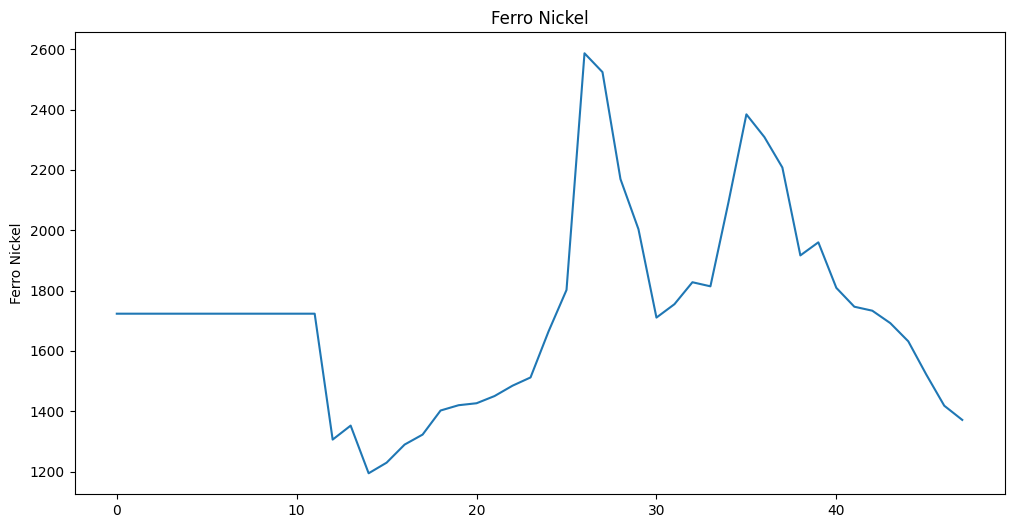

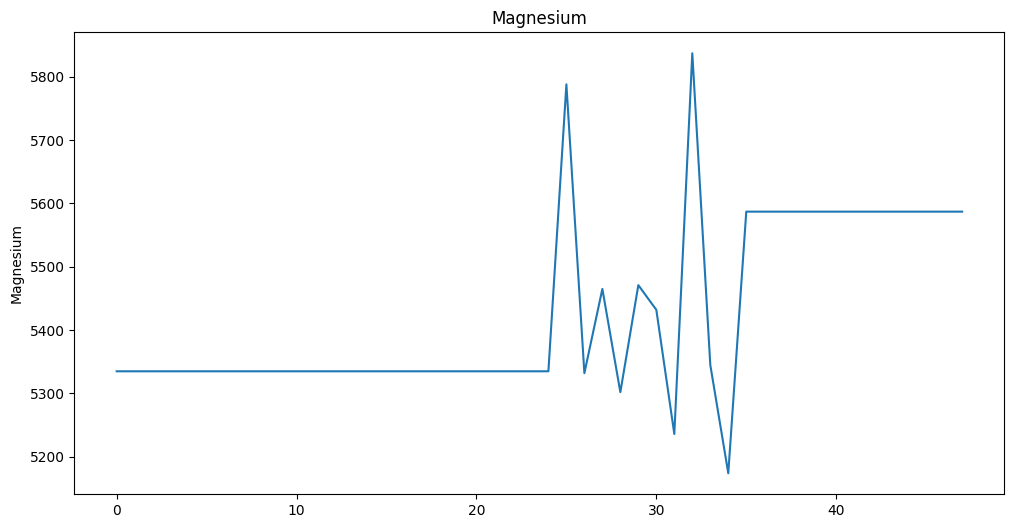

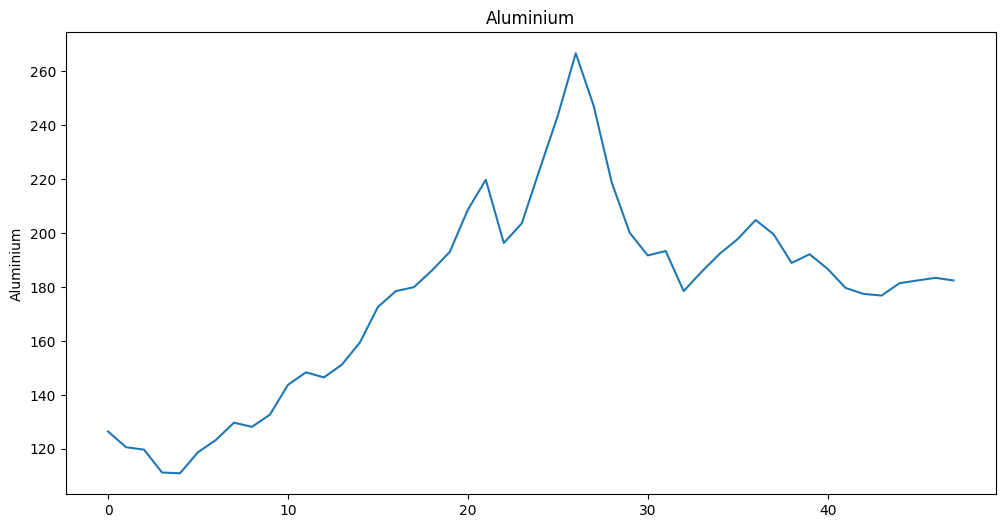

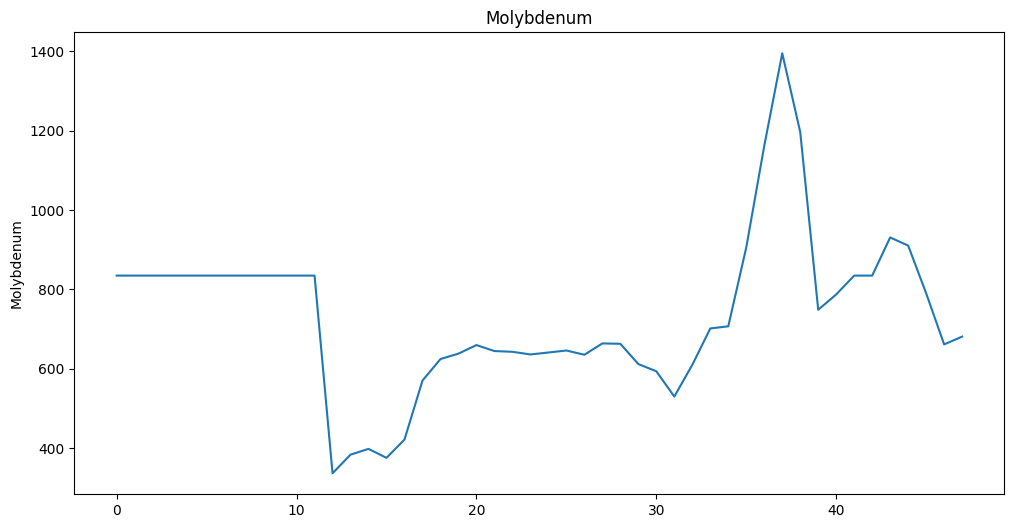

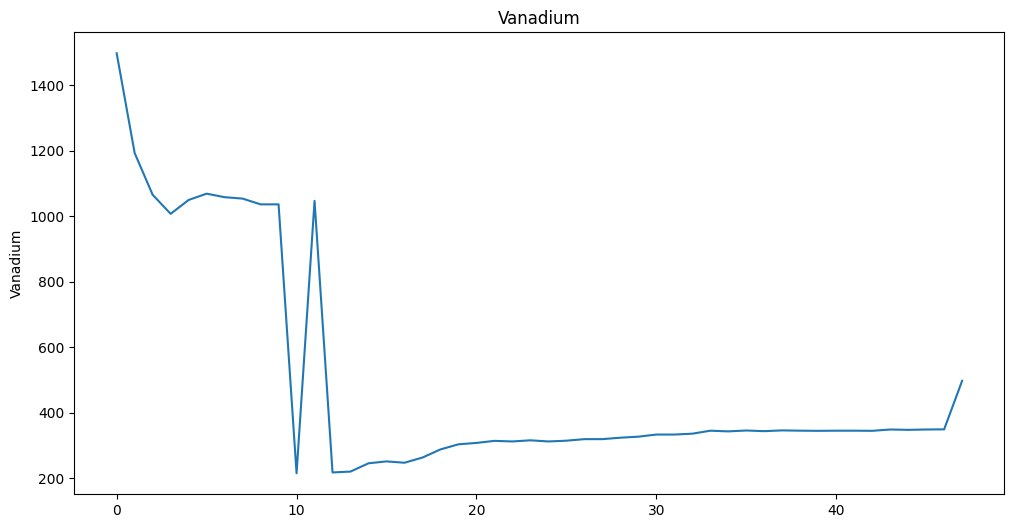

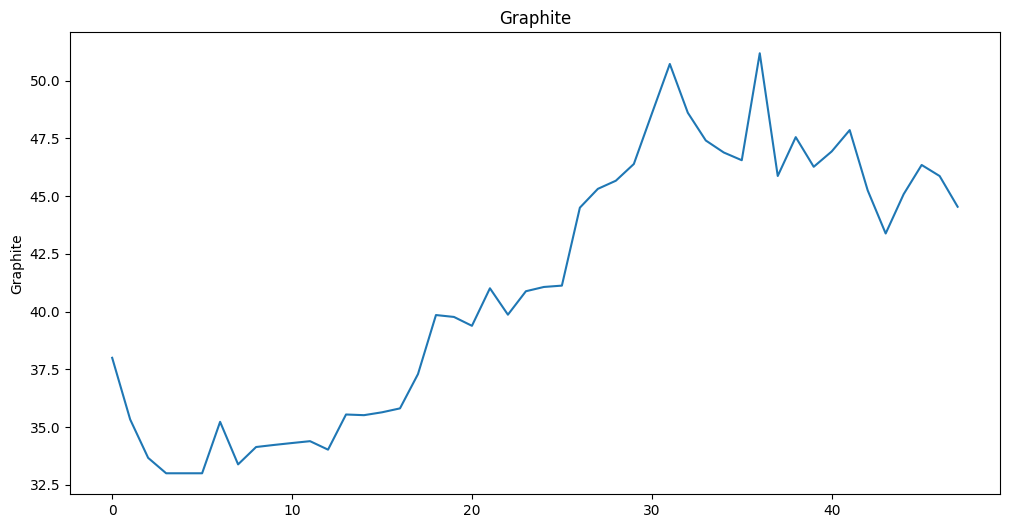

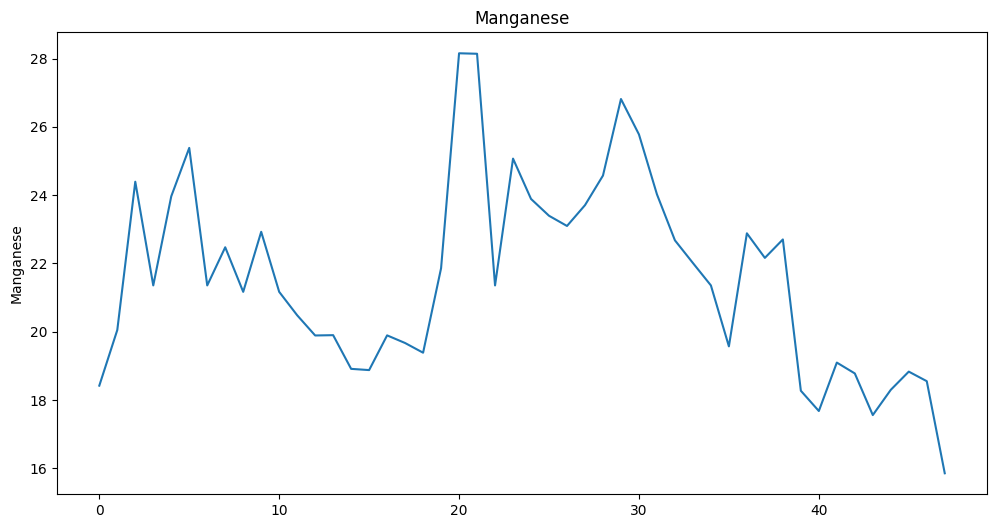

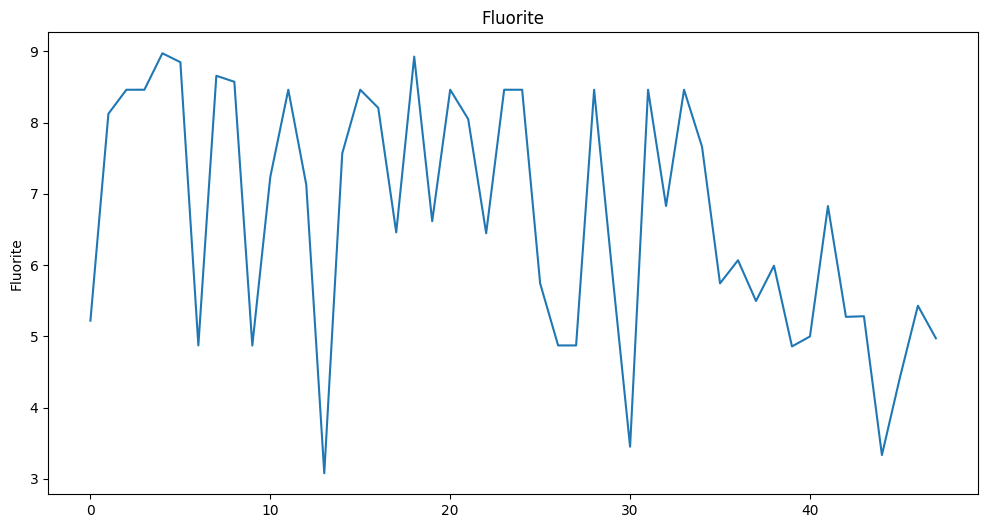

In [ ]:
for metal in df.columns[1:]:
    plt.figure(figsize=(12,6))
    sns.lineplot(df[metal])
    plt.title(metal)
    plt.show()

Stationarity Test

In [ ]:
def adf_test(ts):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

for metal in df.columns[1:]:
    adf_test(df[metal])

Results of Dickey-Fuller Test:
Test Statistic                 -2.309672
p-value                         0.168868
#Lags Used                      1.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  0.130888
p-value                         0.968108
#Lags Used                      6.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -1.995488
p-value                         0.288555
#Lags Used                      1.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64
R

Model Selection

In [ ]:
def fit_arima(ts, order):
    model = SARIMAX(ts, order=order, seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    return model_fit

for metal in df_s.columns[1:]:
    order = (1,1,1)
    model_fit = fit_arima(df[metal], order)
    print(model_fit.summary())

Model Evaluation

In [ ]:
def evaluate_model(model_fit, ts):
    predictions = model_fit.predict(start=len(ts), end=len(ts)+len(ts)-1, dynamic=True)
    mse = mean_squared_error(ts, predictions)
    print('MSE: %.3f' % mse)

for metal in df.columns[1:]:
    order = (1,1,1)
    model_fit = fit_arima(df[metal], order)
    evaluate_model(model_fit, df[metal])

MSE: 232667.628
MSE: 45154.171
MSE: 1348.382
MSE: 41378.733
MSE: 119883.642
MSE: 45.175
MSE: 24.896
MSE: 4.777


Model Fine-tuning

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


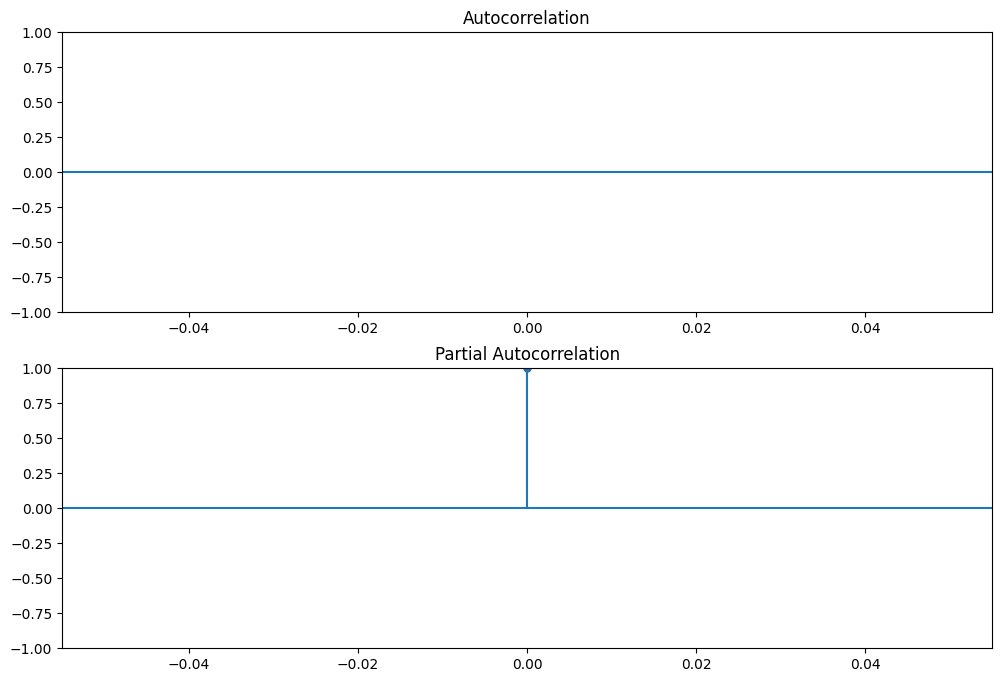

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


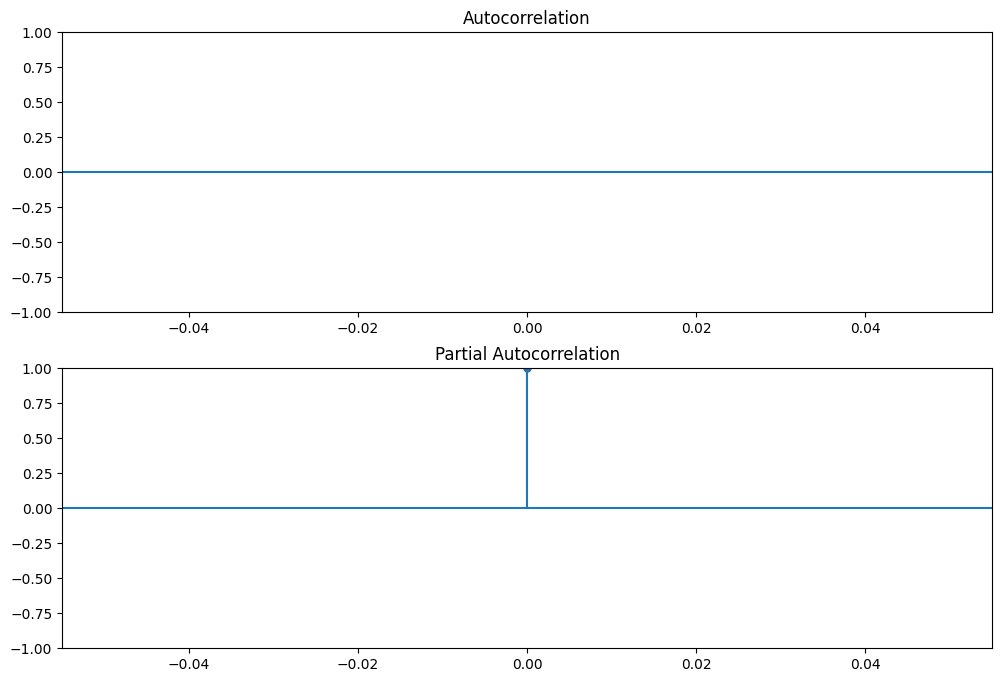

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


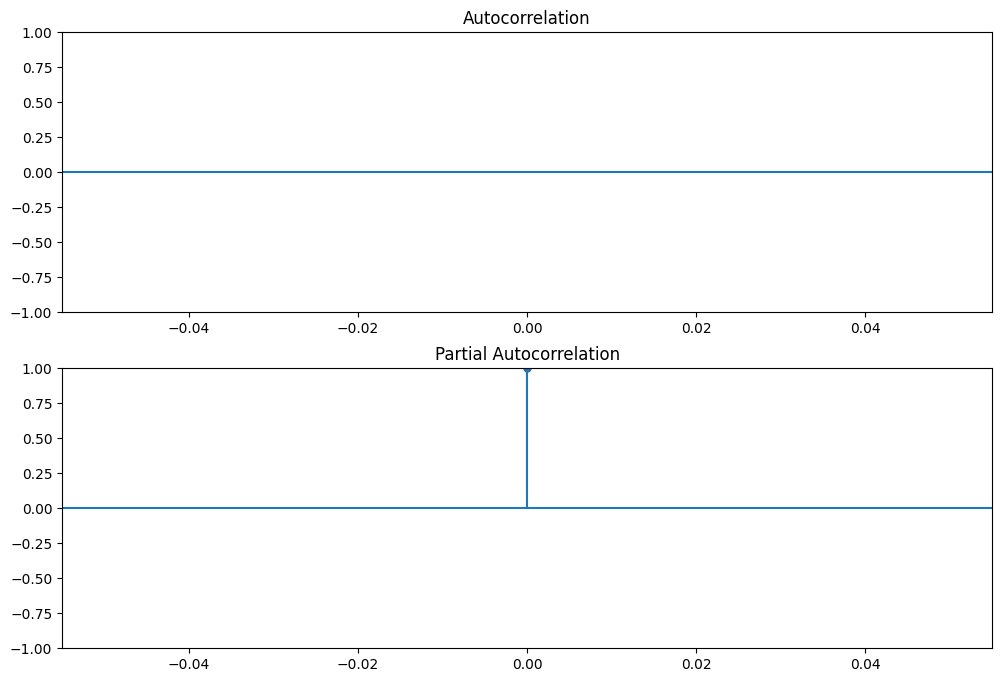

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


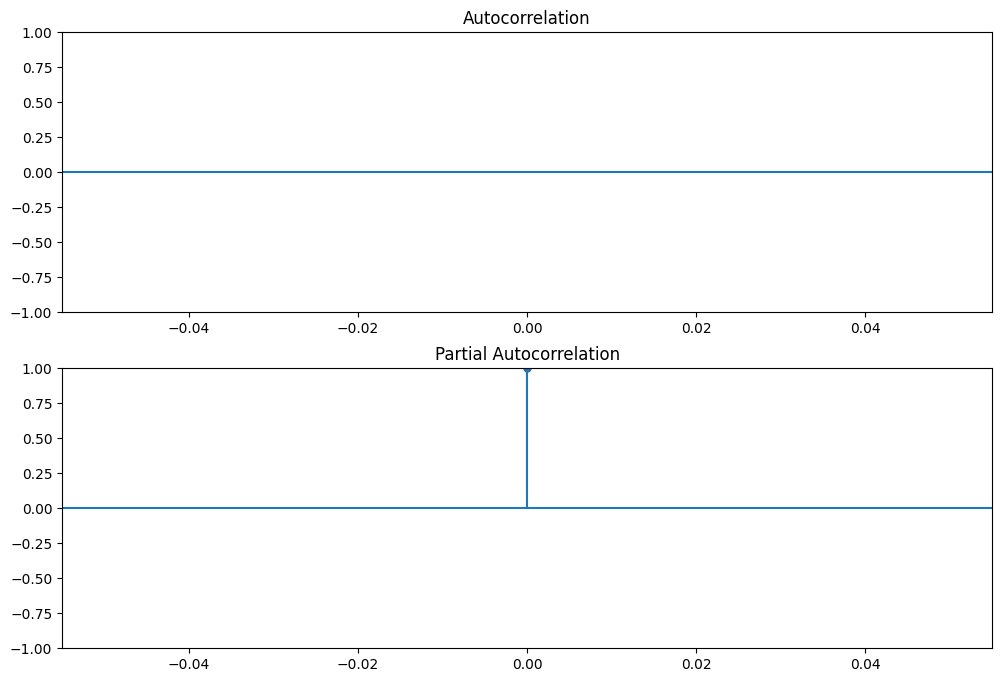

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


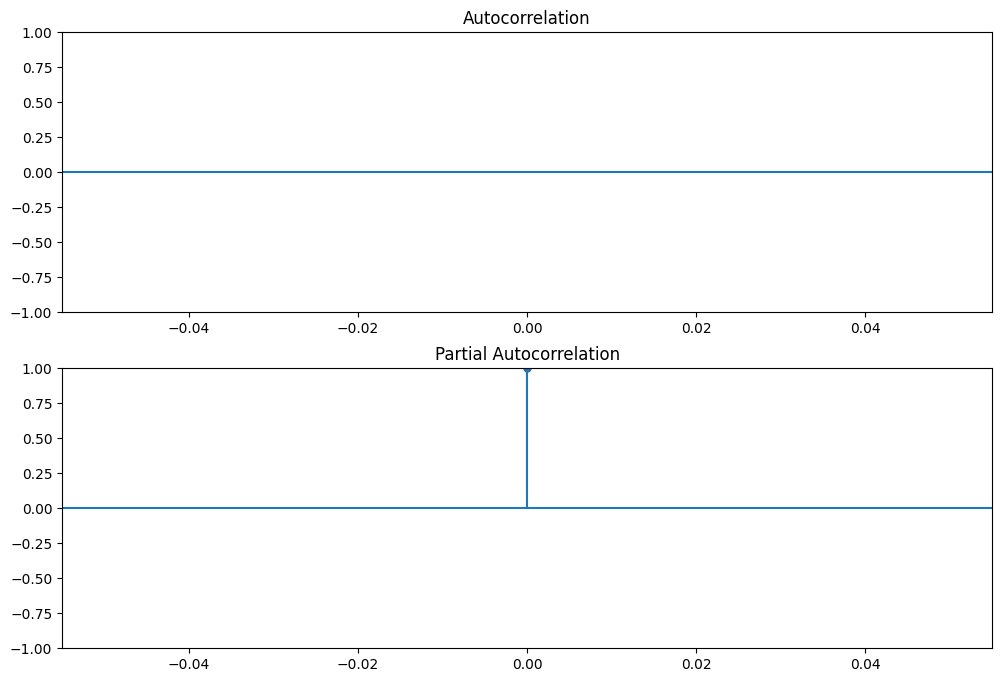

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


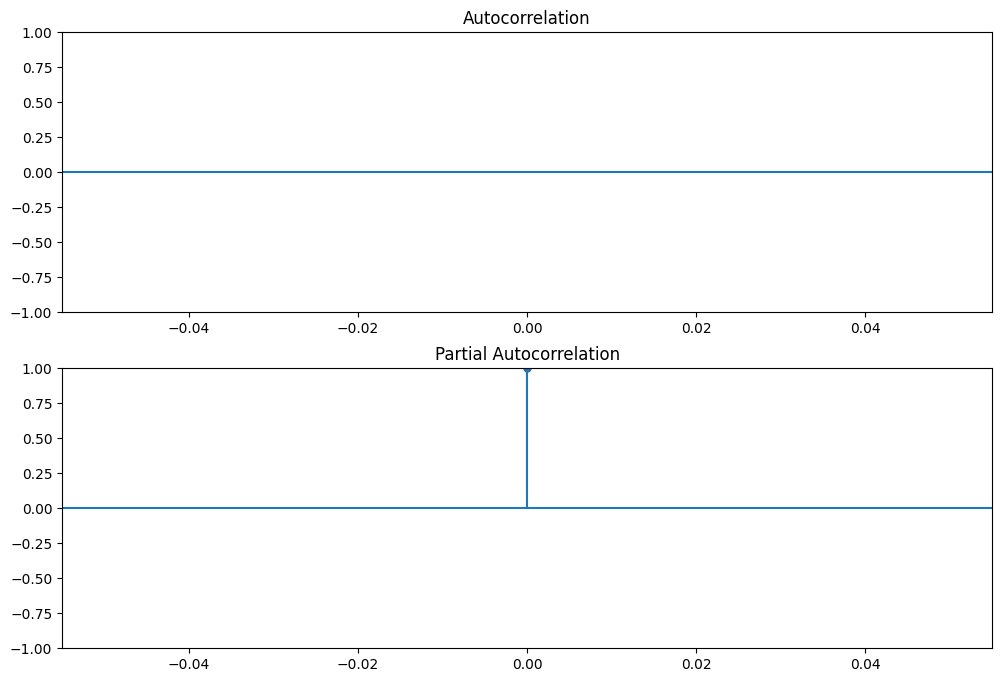

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


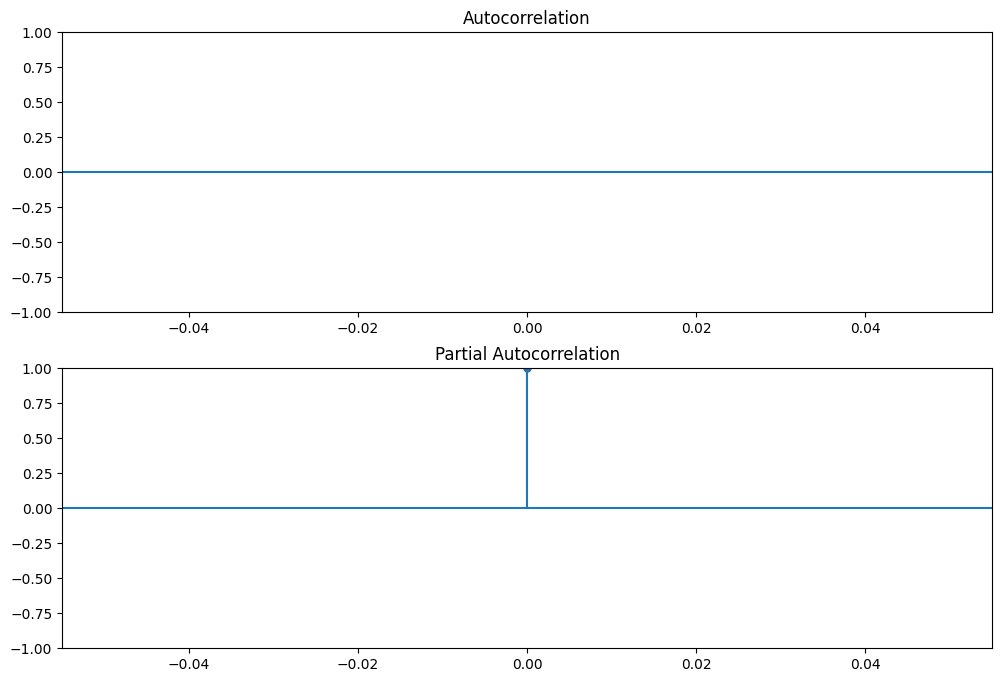

In [ ]:
def plot_acf_pacf(ts):
    fig, axs = plt.subplots(2,1, figsize=(12,8))
    plot_acf(ts, lags=20, ax=axs[0])
    plot_pacf(ts, lags=20, ax=axs[1])
    plt.show()

for metal in data.columns[1:]:
    order = (1,1,1)
    model_fit = fit_arima(data[metal], order)
    plot_acf_pacf(data[metal] - model_fit.predict(start=len(data[metal]), end=len(data[metal]), dynamic=True))

Model Visualization

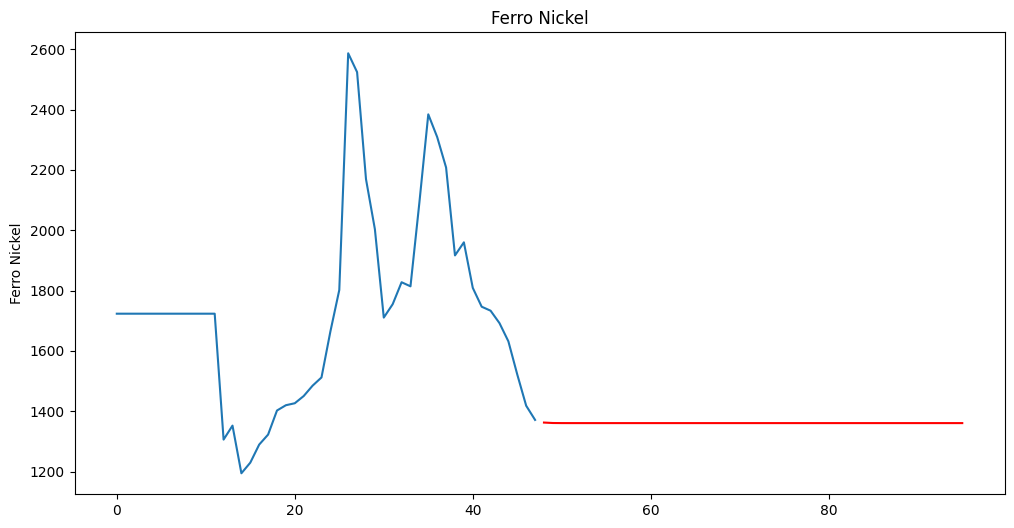

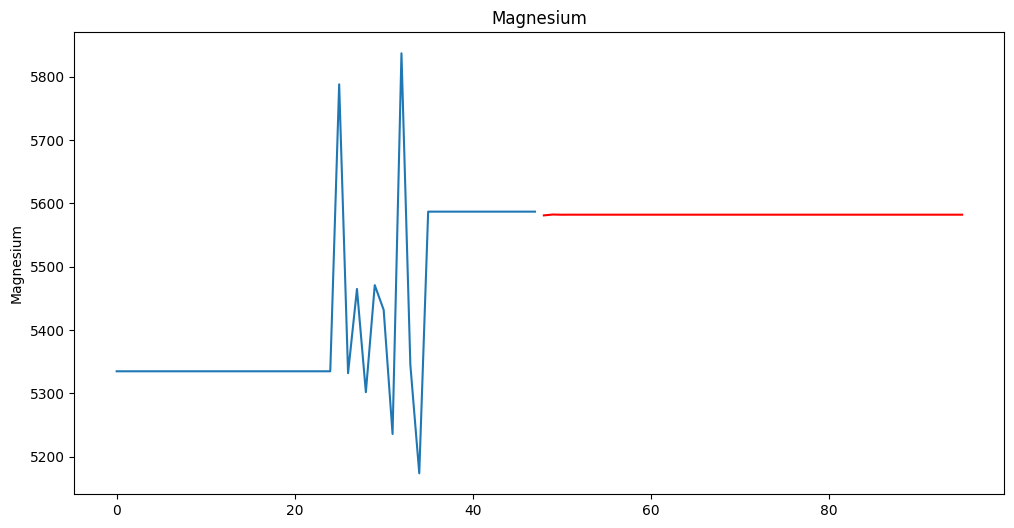

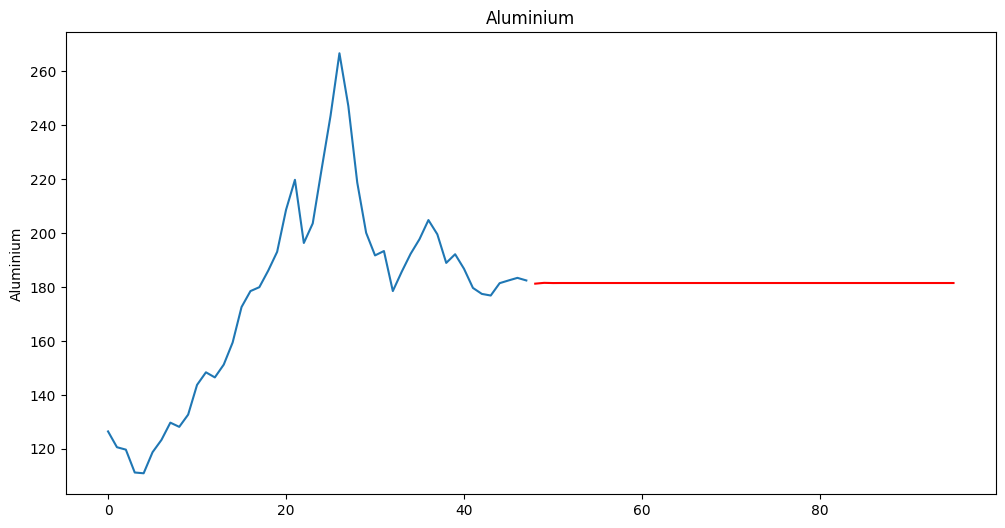

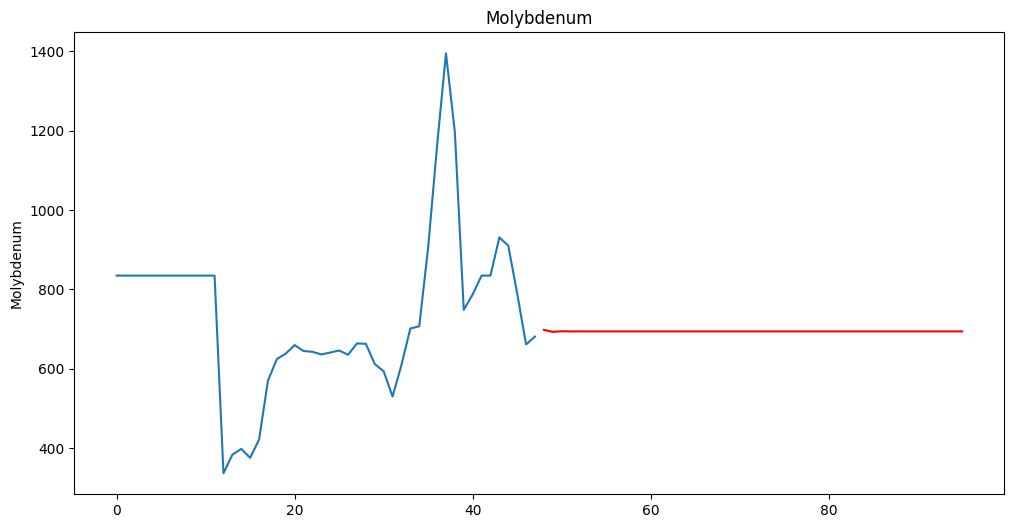

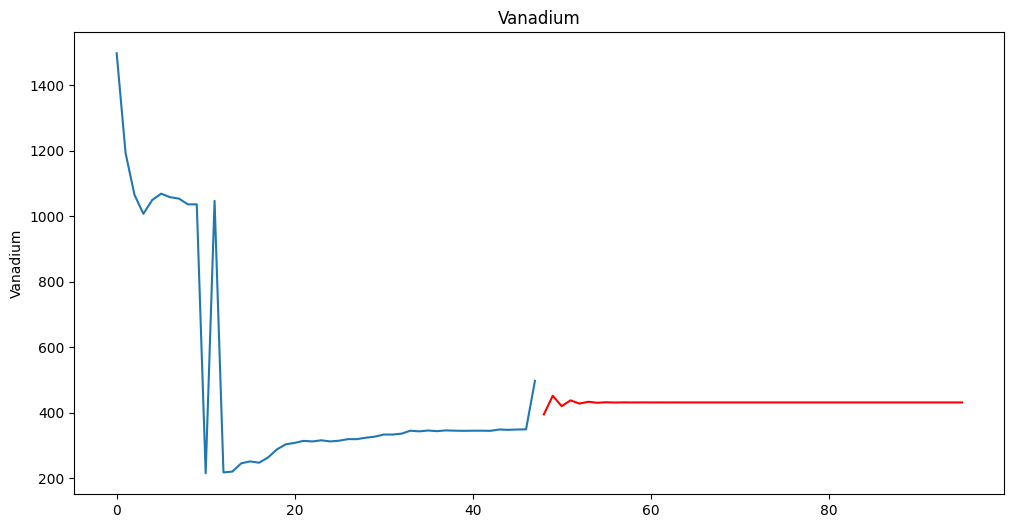

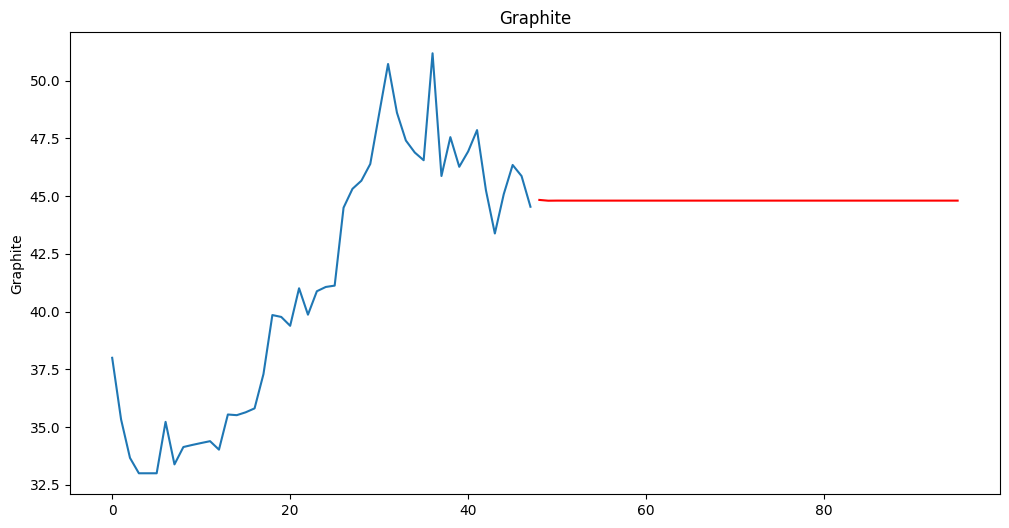

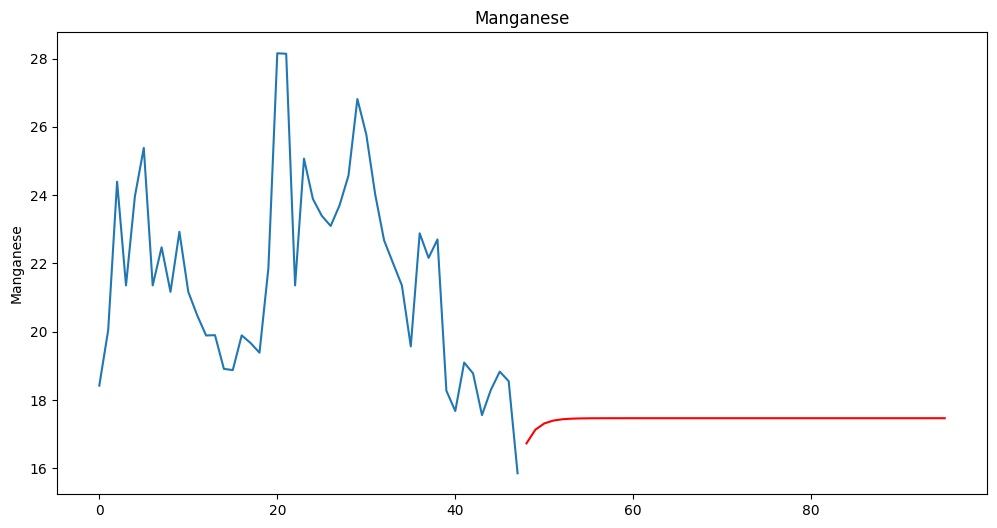

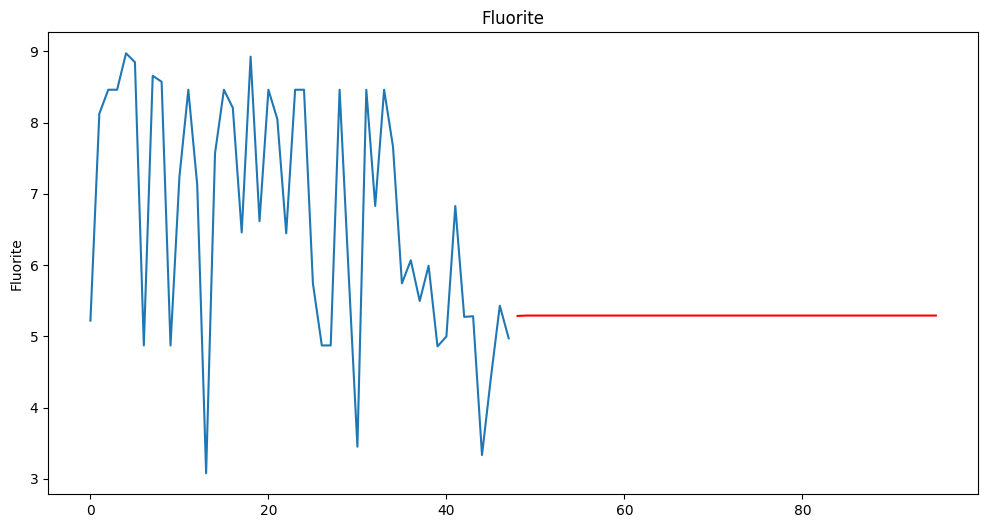

In [ ]:
for metal in df.columns[1:]:
    order = (1,1,1)
    model_fit = fit_arima(df[metal], order)
    predictions = model_fit.predict(start=len(df[metal]), end=len(df[metal])+len(df[metal])-1, dynamic=True)
    plt.figure(figsize=(12,6))
    sns.lineplot(df[metal])
    sns.lineplot(predictions, color='red')
    plt.title(metal)
    plt.show()

Exponential Smoothing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [ ]:
# Select a single metal for this example (e.g., Ferro Nickel)
df_single_metal = df[['Month', 'Ferro Nickel']]

# Convert the Month column to a proper date format
df_single_metal['Month'] = pd.to_datetime(df_single_metal['Month'])
df_single_metal.set_index('Month', inplace=True)

<ipython-input-61-6b6f24f6c22c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_metal['Month'] = pd.to_datetime(df_single_metal['Month'])


In [ ]:
# Build the Exponential Smoothing model
model = ExponentialSmoothing(df_single_metal['Ferro Nickel'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Check if the pmdarima module is installed
!pip show pmdarima

# If not installed, install it
!pip install pmdarima

# Import the auto_arima function from pmdarima
from pmdarima.arima import auto_arima

# Fine-tune the model using auto_arima()
model_auto = auto_arima(df_single_metal['Ferro Nickel'], seasonal=False, trace=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.5 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=855.217, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=640.703, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=642.592, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=642.404, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=634.186, Time=0.43 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=657.085, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=635.414, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=634.965, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=634.636, Ti

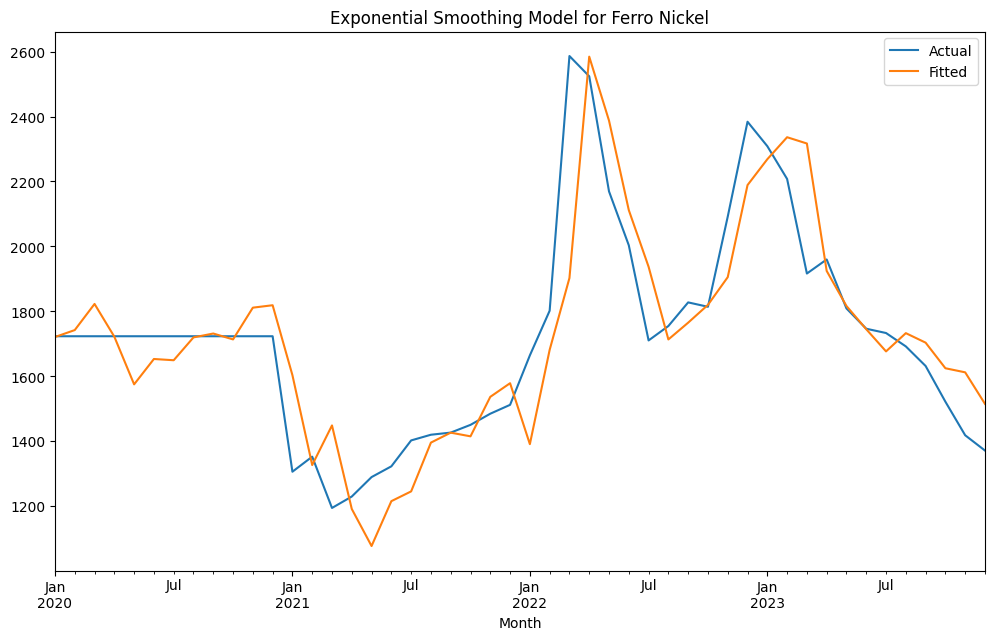

In [ ]:
# Visualize the model's performance
plt.figure(figsize=(12, 7))
df_single_metal['Ferro Nickel'].plot(label='Actual')
model_fit.fittedvalues.plot(label='Fitted')
plt.legend()
plt.title('Exponential Smoothing Model for Ferro Nickel')
plt.show()

In [ ]:
# Check the model's accuracy
from sklearn.metrics import mean_squared_error

y_pred = model_fit.predict(start=len(df_single_metal), end=len(df_single_metal))
mse = mean_squared_error(df_single_metal['Ferro Nickel'].values[-len(y_pred):], y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 14392.769760940653


LSTM (Long Short-Term Memory)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
# Select a single metal for this example (e.g., Ferro Nickel)
df_single_metal = df[['Month', 'Ferro Nickel']]

# Convert the Month column to a date format
df_single_metal['Month'] = pd.to_datetime(df_single_metal['Month'])

# Reshape the data into a 3D array for LSTM input
scaler = MinMaxScaler()
df_single_metal['Ferro Nickel'] = scaler.fit_transform(df_single_metal[['Ferro Nickel']])
X = df_single_metal['Ferro Nickel'].values.reshape(-1, 1, 1)
y = df_single_metal['Ferro Nickel'].values

<ipython-input-68-ed9c876e559d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_metal['Month'] = pd.to_datetime(df_single_metal['Month'])
<ipython-input-68-ed9c876e559d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_metal['Ferro Nickel'] = scaler.fit_transform(df_single_metal[['Ferro Nickel']])


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

In [ ]:
# Fine-tune the model using fit()
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
2/2 [==============================] - 12s 20ms/step - loss: 0.1973
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1893
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 0.1824
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 0.1749
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1668
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 0.1601
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1525
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1448
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 0.1375
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1299
Epoch 11/100
2/2 [==============================] - 0s 18ms/step - loss: 0.1220
Epoch 12/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1139
Epoch 13/100
2/2 [==============================

2/2 [==============================] - 1s 7ms/step


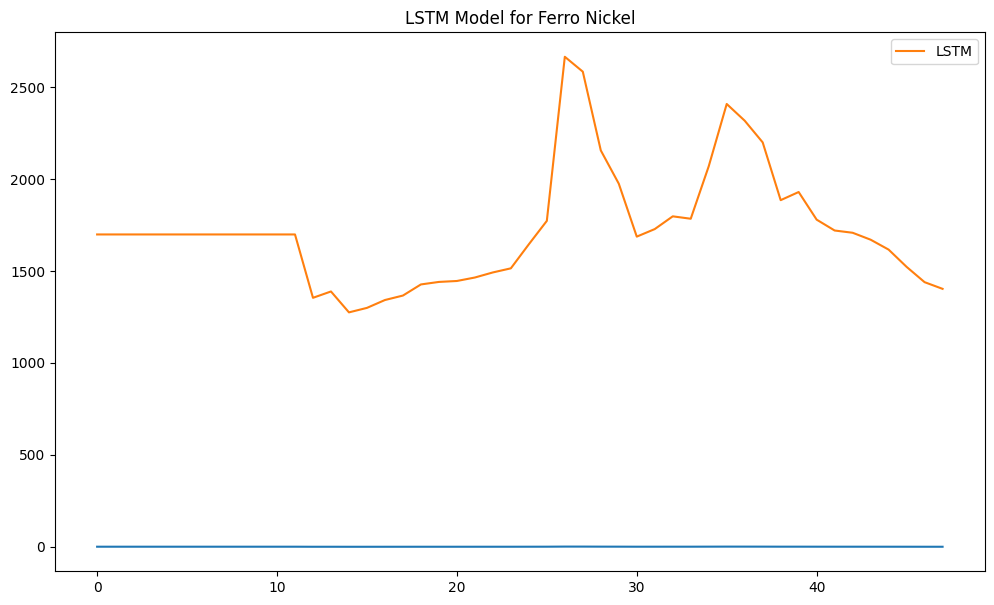

In [ ]:
# Visualize the model's performance
plt.figure(figsize=(12, 7))
plt.plot(df_single_metal['Ferro Nickel'])
plt.plot(df_single_metal.index, scaler.inverse_transform(model.predict(X)), label='LSTM')
plt.legend()
plt.title('LSTM Model for Ferro Nickel')
plt.show()

In [ ]:
# Check the model's accuracy
y_pred = model.predict(X)
mse = np.mean((y_pred - y) ** 2)
print(f'Mean Squared Error: {mse}')

2/2 [==============================] - 0s 5ms/step
Mean Squared Error: 0.10264699084312957


RNNs (Recurrent Neural Network)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
# Select a single metal for this example (e.g., Ferro Nickel)
df_single_metal = df[['Month', 'Ferro Nickel']]

# Convert the Month column to a date format
df_single_metal['Month'] = pd.to_datetime(df_single_metal['Month'])

# Reshape the data into a 3D array for RNN input
scaler = MinMaxScaler()
df_single_metal['Ferro Nickel'] = scaler.fit_transform(df_single_metal[['Ferro Nickel']])
X = df_single_metal['Ferro Nickel'].values.reshape(-1, 1, 1)
y = df_single_metal['Ferro Nickel'].values

<ipython-input-51-0c2c9eff402a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_metal['Month'] = pd.to_datetime(df_single_metal['Month'])
<ipython-input-51-0c2c9eff402a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_metal['Ferro Nickel'] = scaler.fit_transform(df_single_metal[['Ferro Nickel']])


In [ ]:
# Build the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

In [ ]:
# Fine-tune the model using fit()
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
2/2 [==============================] - 7s 25ms/step - loss: 0.1929
Epoch 2/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1851
Epoch 3/100
2/2 [==============================] - 0s 22ms/step - loss: 0.1772
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1699
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 0.1624
Epoch 6/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1555
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 0.1473
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 0.1397
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 0.1319
Epoch 10/100
2/2 [==============================] - 0s 22ms/step - loss: 0.1244
Epoch 11/100
2/2 [==============================] - 0s 20ms/step - loss: 0.1164
Epoch 12/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1082
Epoch 13/100
2/2 [==============================]

2/2 [==============================] - 1s 7ms/step


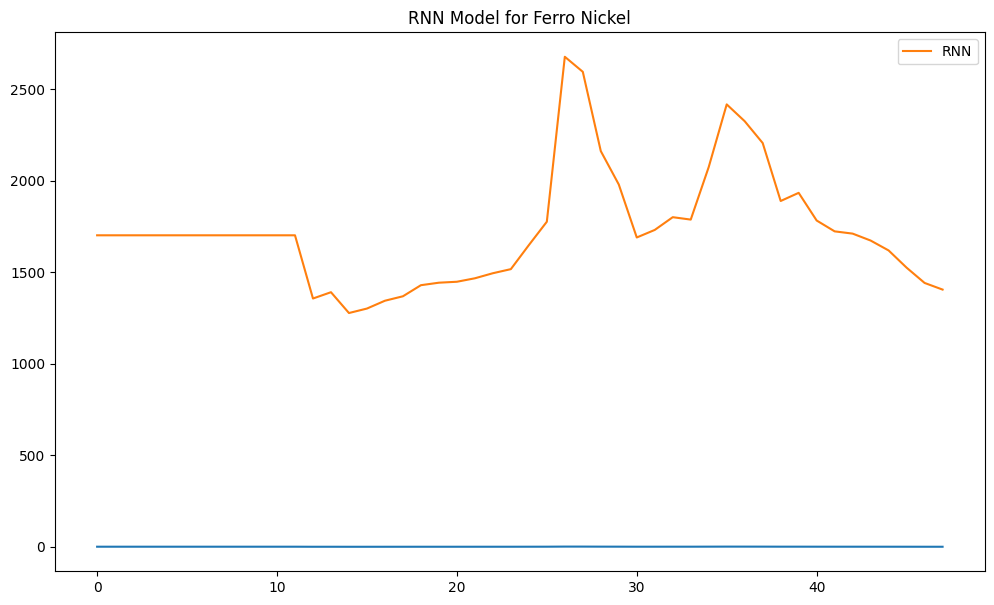

In [ ]:
# Visualize the model's performance
plt.figure(figsize=(12, 7))
plt.plot(df_single_metal['Ferro Nickel'])
plt.plot(df_single_metal.index, scaler.inverse_transform(model.predict(X)), label='RNN')
plt.legend()
plt.title('RNN Model for Ferro Nickel')
plt.show()

In [ ]:
# Check the model's accuracy
y_pred = model.predict(X)
mse = np.mean((y_pred - y) ** 2)
print(f'Mean Squared Error: {mse}')

2/2 [==============================] - 0s 6ms/step
Mean Squared Error: 0.1033059883976738


Seasonal Decomposition of Time Series (STL)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# Prepare the dataset for modeling
y = df['Ferro Nickel']

In [ ]:
# Decompose the time series using STL
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative', period=12)

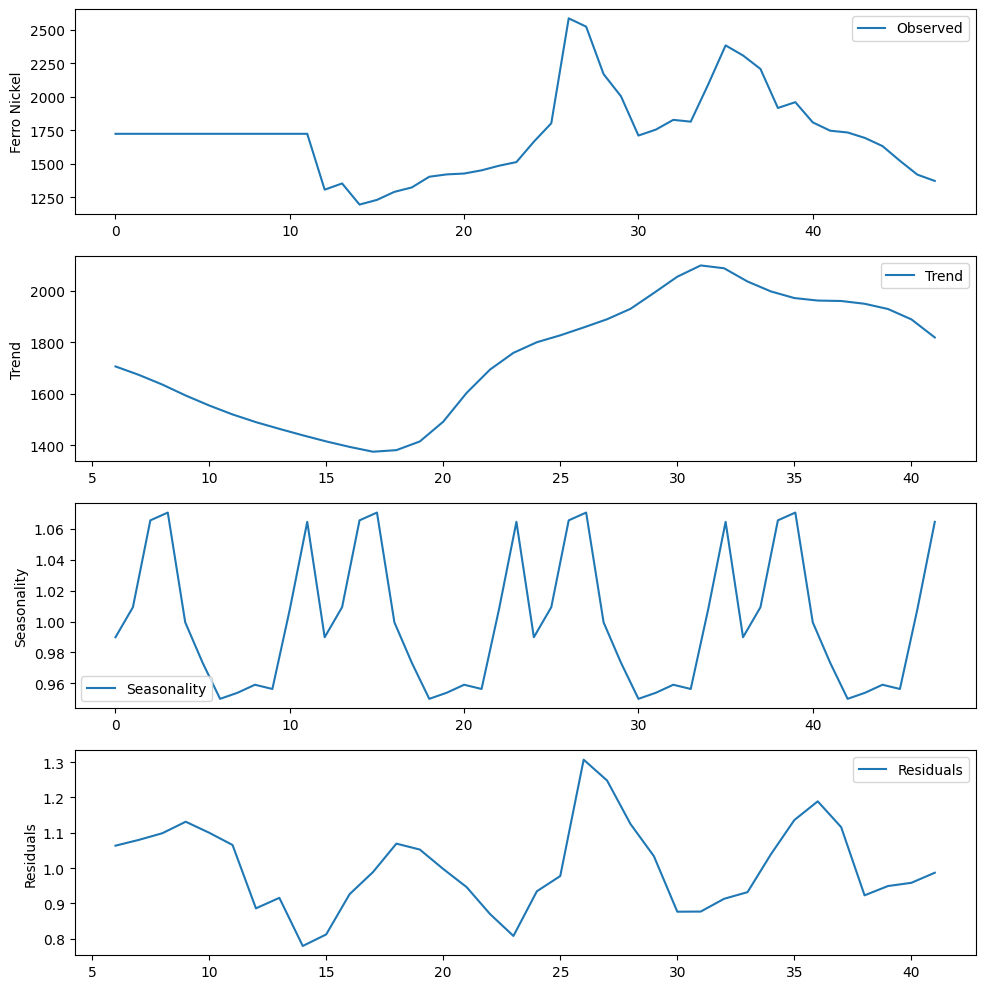

In [ ]:
# Plot the decomposed time series
fig, axes = plt.subplots(4, 1, figsize=(10, 10))
axes[0].plot(y, label='Observed')
axes[0].set_ylabel('Ferro Nickel')
axes[0].legend()
axes[1].plot(decomposition.trend, label='Trend')
axes[1].set_ylabel('Trend')
axes[1].legend()
axes[2].plot(decomposition.seasonal, label='Seasonality')
axes[2].set_ylabel('Seasonality')
axes[2].legend()
axes[3].plot(decomposition.resid, label='Residuals')
axes[3].set_ylabel('Residuals')
axes[3].legend()
plt.tight_layout()
plt.show()

In [ ]:
# Build a model using the residuals
model = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Print the model summary
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       Ferro Nickel   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -238.597
Date:                            Sun, 07 Apr 2024   AIC                            487.194
Time:                                    07:31:56   BIC                            494.970
Sample:                                         0   HQIC                           489.878
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9253      1.548      0.598      0.550      -2.108       3.959
ma.L1         -0.9972     31.342   

In [ ]:
# Forecast the time series
forecast = results.predict(start=len(y), end=len(y)+11, dynamic=True)

In [ ]:
# Calculate the mean squared error
mse = np.mean((forecast - y[-12:]) ** 2)
print('Mean Squared Error:', mse)

Mean Squared Error: nan


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error
# Convert the 'Month' column to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' as the index
df.set_index('Month', inplace=True)

# Calculate the difference between each month and the previous month
df['Difference'] = df['Ferro Nickel'].diff().fillna(0)

# Select the 'Difference' column as the time series
time_series = df['Difference']

In [ ]:
# Build the STL model
stl_model = STL(time_series, period=12)
stl_result = stl_model.fit()

# Decompose the time series into trend, seasonal, and residual components
trend = stl_result.trend
seasonal = stl_result.seasonal
residual = stl_result.resid

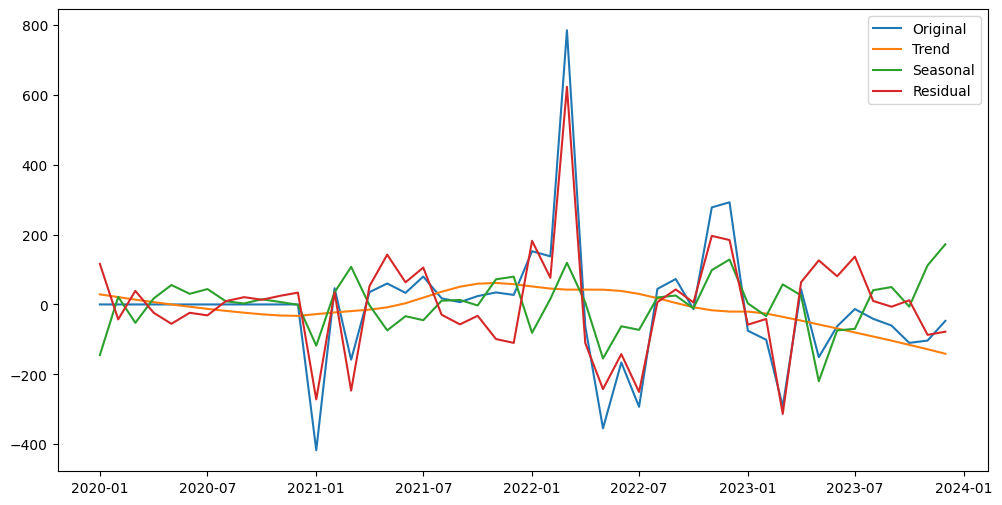

In [ ]:
# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original')

# Plot the trend component
plt.plot(trend, label='Trend')

# Plot the seasonal component
plt.plot(seasonal, label='Seasonal')

# Plot the residual component
plt.plot(residual, label='Residual')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Calculate the predicted values
predictions = stl_result.trend + stl_result.seasonal + stl_result.resid

# Calculate the mean squared error
mse = mean_squared_error(time_series, predictions)

# Print the mean squared error
print('Mean squared error:', mse)

Mean squared error: 3.6813508910313886e-28


In [ ]:
import joblib

# Save the model
joblib.dump(stl_model, 'stl_model.joblib')

['stl_model.joblib']

Random Forest Regressior

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
# Convert the date column to a numerical format
df["Month"] = pd.to_datetime(df["Month"]).dt.to_period("M")
df["Month"] = df["Month"].astype("int")

In [ ]:
# Separate the features and labels
X = df.drop(columns=["Ferro Nickel"])
y = df["Ferro Nickel"]

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Fine-tune the model by adjusting hyperparameters
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
# Evaluate the model's performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 178738.2970733104


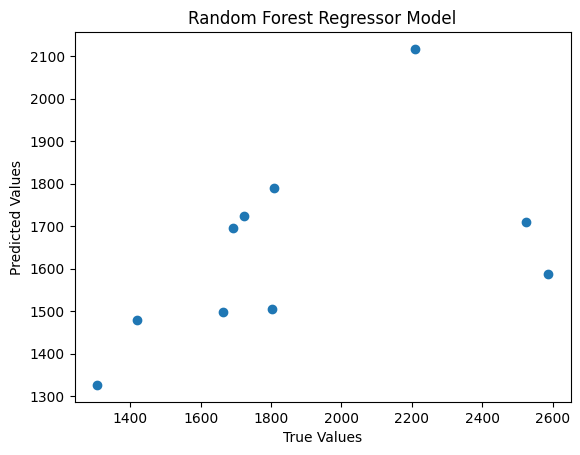

In [ ]:
# Visualize the model's performance
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor Model")
plt.show()

In [ ]:
# Save the model
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

ARIMA

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np


# Convert the "Month" column to a numerical format
df['Month'] = pd.to_datetime(df['Month']).dt.to_period('M')
df['Month'] = df['Month'].astype('int')

# Separate the features and target
X = df.drop(columns=['Ferro Nickel'])
y = df['Ferro Nickel']

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(y, order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Ferro Nickel   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -308.614
Date:                Sun, 07 Apr 2024   AIC                            623.229
Time:                        13:28:37   BIC                            628.779
Sample:                             0   HQIC                           625.317
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1707      0.490      0.348      0.728      -0.790       1.132
ma.L1          0.0271      0.484      0.056      0.955      -0.921       0.975
sigma2      2.955e+04   3283.419      8.999      0.0

In [ ]:
# Fit the ARIMA model using auto_arima
model = auto_arima(y, seasonal=True, m=12)

# Print the model summary
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   48
Model:             SARIMAX(2, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -309.604
Date:                              Sun, 07 Apr 2024   AIC                            629.208
Time:                                      13:29:07   BIC                            638.564
Sample:                                           0   HQIC                           632.744
                                               - 48                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    320.9203    177.570      1.807      0.071     -27.111     668.952
ar.L1          1.10

In [ ]:
# Make predictions
y_pred = model.predict(n_periods=len(y))

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)

# Print the mean squared error
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 108105.40068961373


In [ ]:
from pmdarima.arima import auto_arima

# Fit the ARIMA model using auto_arima
model = auto_arima(y, seasonal=True, m=12)

# Print the model summary
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   48
Model:             SARIMAX(2, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -309.604
Date:                              Sun, 07 Apr 2024   AIC                            629.208
Time:                                      13:29:36   BIC                            638.564
Sample:                                           0   HQIC                           632.744
                                               - 48                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    320.9203    177.570      1.807      0.071     -27.111     668.952
ar.L1          1.10

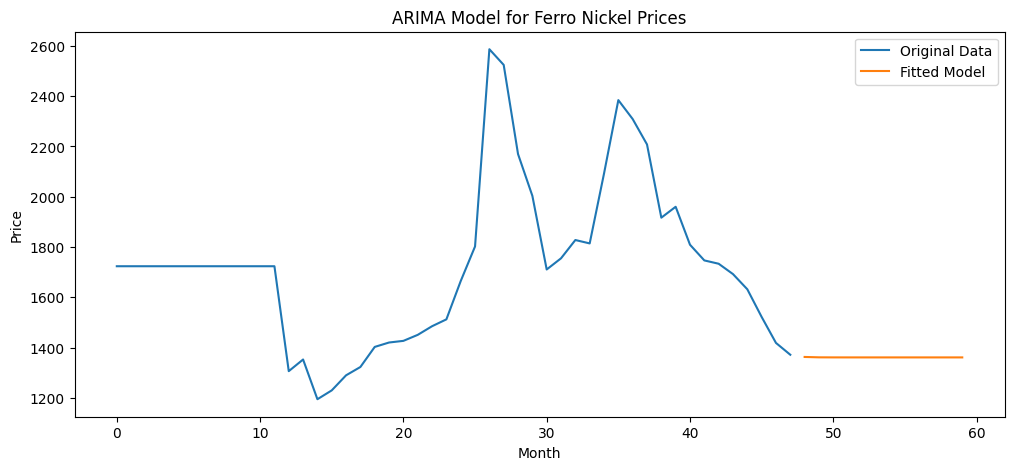

In [ ]:
import matplotlib.pyplot as plt

# Plot the original data
plt.figure(figsize=(12, 5))
plt.plot(y, label='Original Data')

# Plot the fitted model
y_pred = model_fit.predict(start=len(y), end=len(y)+11, dynamic=True)
plt.plot(y_pred, label='Fitted Model')

plt.title('ARIMA Model for Ferro Nickel Prices')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'arima_model.joblib')

['arima_model.joblib']

In [ ]:
# Make predictions
y_pred = model.predict(n_periods=len(y))

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 108105.40068961373
Root Mean Squared Error: 328.79385743899434


Support Vector Classifier (SVC)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [ ]:
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
# Convert 'month' to a datetime type if not already
df['Month'] = pd.to_datetime(df['Month'])

# Extract year and month as numerical features
df['year'] = df['Month'].dt.year
df['Month_num'] = df['Month'].dt.month

# Now drop the original 'month' column to avoid the error
df = df.drop('Month', axis=1)


In [ ]:
X = df.drop('Ferro Nickel', axis=1)  # Adjusted to exclude the datetime column
y = df['Ferro Nickel']  # Assuming 'Target' is your target variable

# Continue with your train-test split, scaling, and so forth.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# This is a simplistic approach to categorize into two classes
# Choose a threshold that makes sense for your problem
threshold = y.median()  # This could be an average price, median, or specific value significant to your study

y_categorical = ['High' if price > threshold else 'Low' for price in y]

# Now, use this categorical target for splitting
y_train, y_test = train_test_split(y_categorical, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initiating the SVC model
svc = SVC(kernel='linear', C=1, random_state=42)

# Fitting the model
svc.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = svc.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy*100:.2f}%')


Model Accuracy: 80.00%


In [ ]:
# Defining the model
svc = SVC(random_state=42)

# Parameters for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [3, 4, 5],
    'gamma': ['scale', 'auto']
}

# Grid search for parameter tuning
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test_scaled)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled, y_train)

print(f'Best Parameters: {grid.best_params_}')


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=

In [ ]:
print(f'y_test data type: {y_test.dtype}')
print(f'grid.predict(X_test_scaled) data type: {grid.predict(X_test_scaled).dtype}')

y_test data type: <U4
grid.predict(X_test_scaled) data type: <U4


In [ ]:
print(y_test.dtype)
print(grid.predict(X_test_scaled).dtype)

<U4
<U4


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming this step comes before your train-test split
label_encoder = LabelEncoder()
df['Ferro Nickel'] = label_encoder.fit_transform(df['Ferro Nickel'])

# Followed by your train-test split and model fitting code


In [ ]:
# Define a dictionary to map string values to numerical values
value_mapping = {'High': 1, 'Low': 0}

# Apply the mapping to both arrays
y_test_numeric = np.array([value_mapping[value] for value in y_test])
y_pred_numeric = np.array([value_mapping[value] for value in y_pred])

# Calculate the MSE
mse = mean_squared_error(y_test_numeric, y_pred_numeric)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.2


In [ ]:
# Ensure y_test and y_pred are correctly prepared and follow the same encoding
f1 = f1_score(y_test, y_pred, average='weighted') # This is correct for imbalanced multi-class classification
print(f'F1-Score: {f1}')


F1-Score: 0.7916666666666666


In [ ]:
from sklearn.metrics import roc_auc_score

# This is applicable for binary classification and assumes y_test and y_pred are appropriately encoded
# For multi-class classification, ensure to set the 'multi_class' parameter accordingly
roc_auc = roc_auc_score(y_test, grid.decision_function(X_test_scaled))
print(f'ROC AUC Score: {roc_auc}')


ROC AUC Score: 0.8


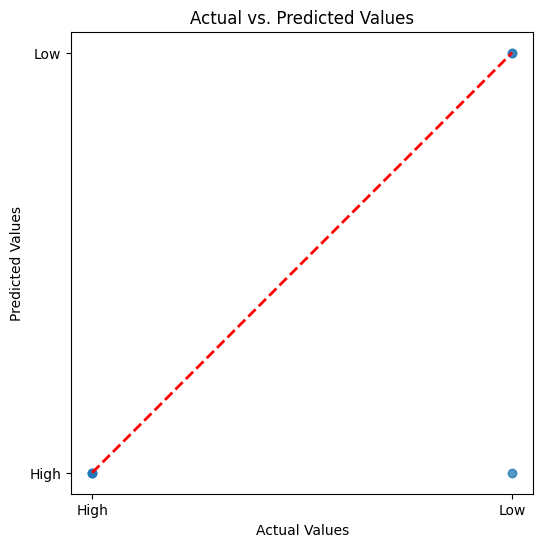

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already made predictions on the test set
y_test_actual = y_test
y_test_pred = grid.predict(X_test_scaled)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual vs. predicted values
ax.scatter(y_test_actual, y_test_pred, alpha=0.5)

# Add labels and title
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Actual vs. Predicted Values')

# Add a 45-degree line to represent perfect predictions
min_val = min(min(y_test_actual), min(y_test_pred))
max_val = max(max(y_test_actual), max(y_test_pred))
ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

# Adjust the aspect ratio to make the plot square-like
ax.set_aspect('equal', 'box')

# Display the plot
plt.show()


Exponential

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
df.rename(columns={'FerroNickel': 'Ferro Nickel'}, inplace=True)

In [ ]:
# Extract the relevant columns for modeling
x = np.arange(len(df))
y = df['Graphite'].values

In [ ]:
# Define the exponential function
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

In [ ]:
# Fit the exponential model to the data
popt, pcov = curve_fit(exponential_func, x, y)

In [ ]:
# Generate the predicted values using the fitted model
y_pred = exponential_func(x, *popt)

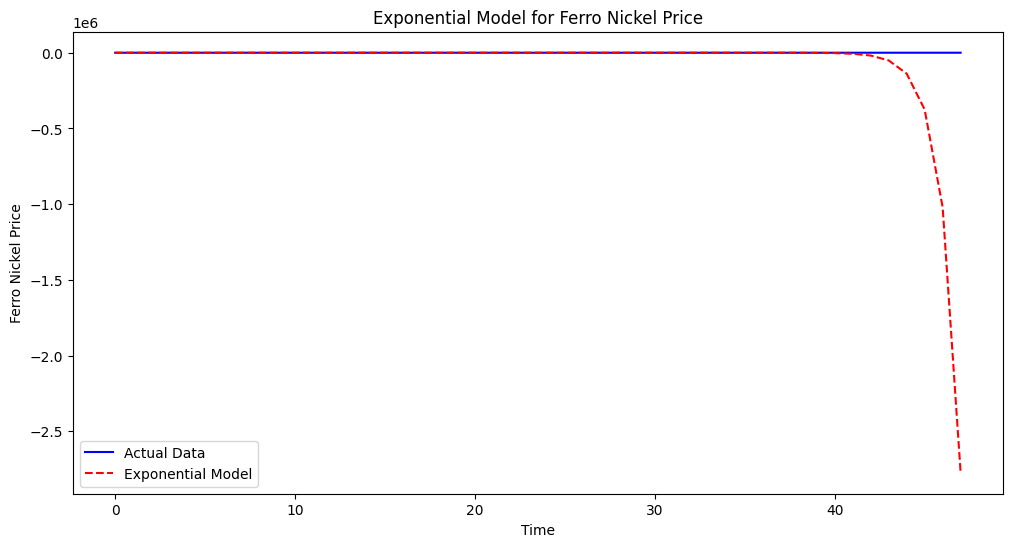

In [ ]:
# Plot the original data and the exponential model
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b-', label='Actual Data')
plt.plot(x, y_pred, 'r--', label='Exponential Model')
plt.xlabel('Time')
plt.ylabel('Ferro Nickel Price')
plt.title('Exponential Model for Ferro Nickel Price')
plt.legend()
plt.show()

In [ ]:
# Prepare the data for training and testing
X = df.drop(['Month', 'Graphite'], axis=1)
y = df['Graphite']

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the model
# Here, you can use any regression model, such as Linear Regression, Random Forest Regression, etc.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate the MSE and accuracy score
mse = mean_squared_error(y_test, y_pred)
accuracy = np.sqrt(1 / (1 + mse))

print('Mean Squared Error:', mse)
print('Accuracy Score:', accuracy)

Mean Squared Error: 44.39719731865217
Accuracy Score: 0.14841762550736834


Multiplicative Seasonality

In [ ]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Preprocessing
df.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values

# Decompose the time series to identify seasonality
decomposition_results = {}
for column in df.columns:
    decomposition = seasonal_decompose(df[column], model='multiplicative', period=12)
    decomposition_results[column] = decomposition
    df[column + '_seasonal'] = decomposition.seasonal


In [ ]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

# Model building and evaluation
model_results = {}
for column in train_df.columns:
    if 'seasonal' in column:
        continue  # Skip the seasonal components
    # Assume a simple model where we use the seasonal component as the prediction
    y_true = test_df[column]
    y_pred = test_df[column + '_seasonal'][:len(y_true)]
    mse = mean_squared_error(y_true, y_pred)
    model_results[column] = {'MSE': mse, 'Predictions': y_pred}

# Display the mean squared error for each metal
for metal, result in model_results.items():
    print(f'{metal}: MSE = {result["MSE"]}')


Magnesium: MSE = 31203426.81919254
Aluminium: MSE = 33213.92582832635
Molybdenum: MSE = 721050.6463420561
Vanadium: MSE = 132325.64587157834
Graphite: MSE = 2018.3351164220603
Manganese: MSE = 311.11974587865
Fluorite: MSE = 17.780840243757908


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# Assuming y_true contains the actual values and y_pred contains the model predictions
y_true = [1, 0, 1, 1, 0, 0, 1]  # Replace with your actual values
y_pred = [0, 0, 1, 1, 0, 0, 0]  # Replace with your model predictions
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 0.2857142857142857
Root Mean Squared Error: 0.5345224838248488


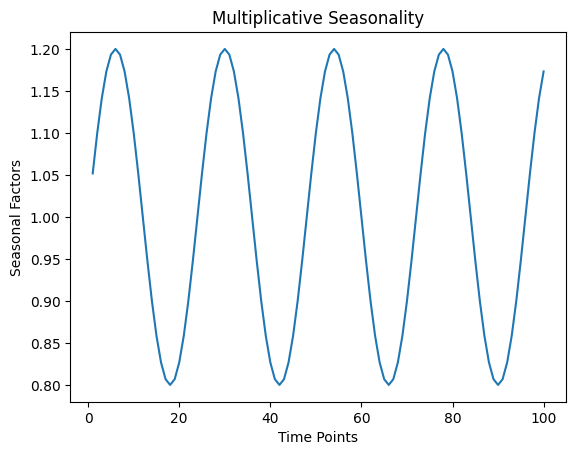

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a list of time points
time_points = np.arange(1, 101)

# Define the multiplicative seasonality function
def multiplicative_seasonality(time_points, period, amplitude):
  return 1 + amplitude * np.sin(2 * np.pi * time_points / period)

# Set the period and amplitude of the seasonality
period = 24
amplitude = 0.2

# Calculate the seasonal factors
seasonal_factors = multiplicative_seasonality(time_points, period, amplitude)

# Plot the seasonal factors
plt.plot(time_points, seasonal_factors)
plt.xlabel("Time Points")
plt.ylabel("Seasonal Factors")
plt.title("Multiplicative Seasonality")
plt.show()